In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [12]:

%matplotlib inline

In [13]:
cd /Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift/

/Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift


In [14]:
series = pd.read_csv('train/subj5_series1_data.csv', index_col=0)
print(series.head())

                 Fp1  Fp2  F7   F3   Fz  F4    F8  FC5  FC1  FC2  ...   P7  \
id                                                                ...        
subj5_series1_0   65  465  18 -235 -206  14 -1146   88  -53 -305  ...  -15   
subj5_series1_1   59  474  32 -231 -205   0 -1124  112  -40 -317  ...   38   
subj5_series1_2   34  482  27 -224 -216  -7 -1132  115  -60 -313  ...   36   
subj5_series1_3   22  441 -28 -241 -219  16 -1207  100  -77 -310  ...   37   
subj5_series1_4   34  404 -52 -285 -242   0 -1246   69 -104 -323  ...   10   

                  P3  Pz  P4   P8  PO9  O1   Oz   O2  PO10  
id                                                          
subj5_series1_0  258 -44  41  197 -480 -81 -137 -109    12  
subj5_series1_1  263 -43  75  108 -403 -46 -107  -94   -27  
subj5_series1_2  266 -34  56    5 -385 -18 -105  -97   -55  
subj5_series1_3  304 -10  65   -7 -330  -1  -81  -75    20  
subj5_series1_4  290 -12  57   45 -287   6  -73  -88     8  

[5 rows x 32 columns]


In [15]:
events = pd.read_csv('train/subj5_series1_events.csv', index_col=0)
print(events.head())

                 HandStart  FirstDigitTouch  BothStartLoadPhase  LiftOff  \
id                                                                         
subj5_series1_0          0                0                   0        0   
subj5_series1_1          0                0                   0        0   
subj5_series1_2          0                0                   0        0   
subj5_series1_3          0                0                   0        0   
subj5_series1_4          0                0                   0        0   

                 Replace  BothReleased  
id                                      
subj5_series1_0        0             0  
subj5_series1_1        0             0  
subj5_series1_2        0             0  
subj5_series1_3        0             0  
subj5_series1_4        0             0  


In [16]:
# are there overlapping classes?
sum_events = events.sum(axis=1)

# if a row in the events data frame has sum greater than one,
# it means that more than one action is recorded at the same time
print("Number of rows where two events are happen simultaneously:", len(sum_events[sum_events == 2]))
print("Number of rows where three events are happen simultaneously:", len(sum_events[sum_events == 3]))
print("Number of rows where four events are happen simultaneously:", len(sum_events[sum_events == 4]))

Number of rows where two events are happen simultaneously: 4453
Number of rows where three events are happen simultaneously: 60
Number of rows where four events are happen simultaneously: 0


In [17]:
# let's convert the events data frame to a single vector of events
# the encoding is the following
# 0: no action occurrs
# 1: HandStart
# 2: FirstDigitTouch
# 3: BothStartLoadPhase
# 4: LiftOff
# 5: Replace
# 6: BothReleased
# NOTE: What do we do with the overlapping classes?
# For now, I'm just going to take the first label
# For example, if 'BothStartLoadPhase' and 'Replace' are both 1 in one row,
# the row looks like [0, 0, 0, 1, 1, 0], but I will say that the label for
# the row is just 3 (BothStartLoadPhase)
num_samples = len(events)
labels = np.zeros(num_samples) # start with an array of all zeros
non_zero = np.any(events.values > 0, axis=1) # get a Boolean array indicating which rows have at least one 1
# the class label is the one plus the index of the first occurrence of 1
labels[non_zero] = (np.argmax(events.values, axis=1)[non_zero] + 1) 

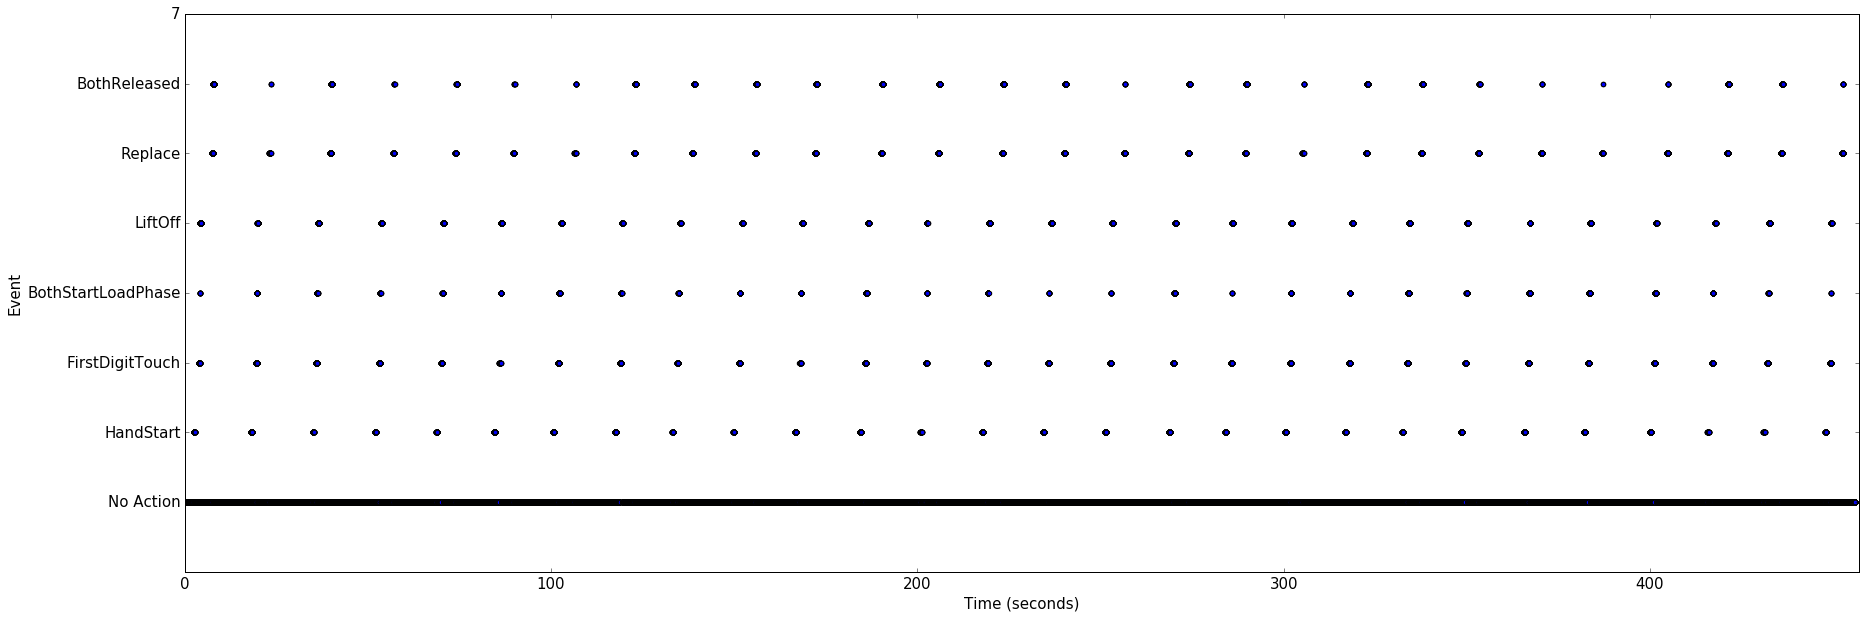

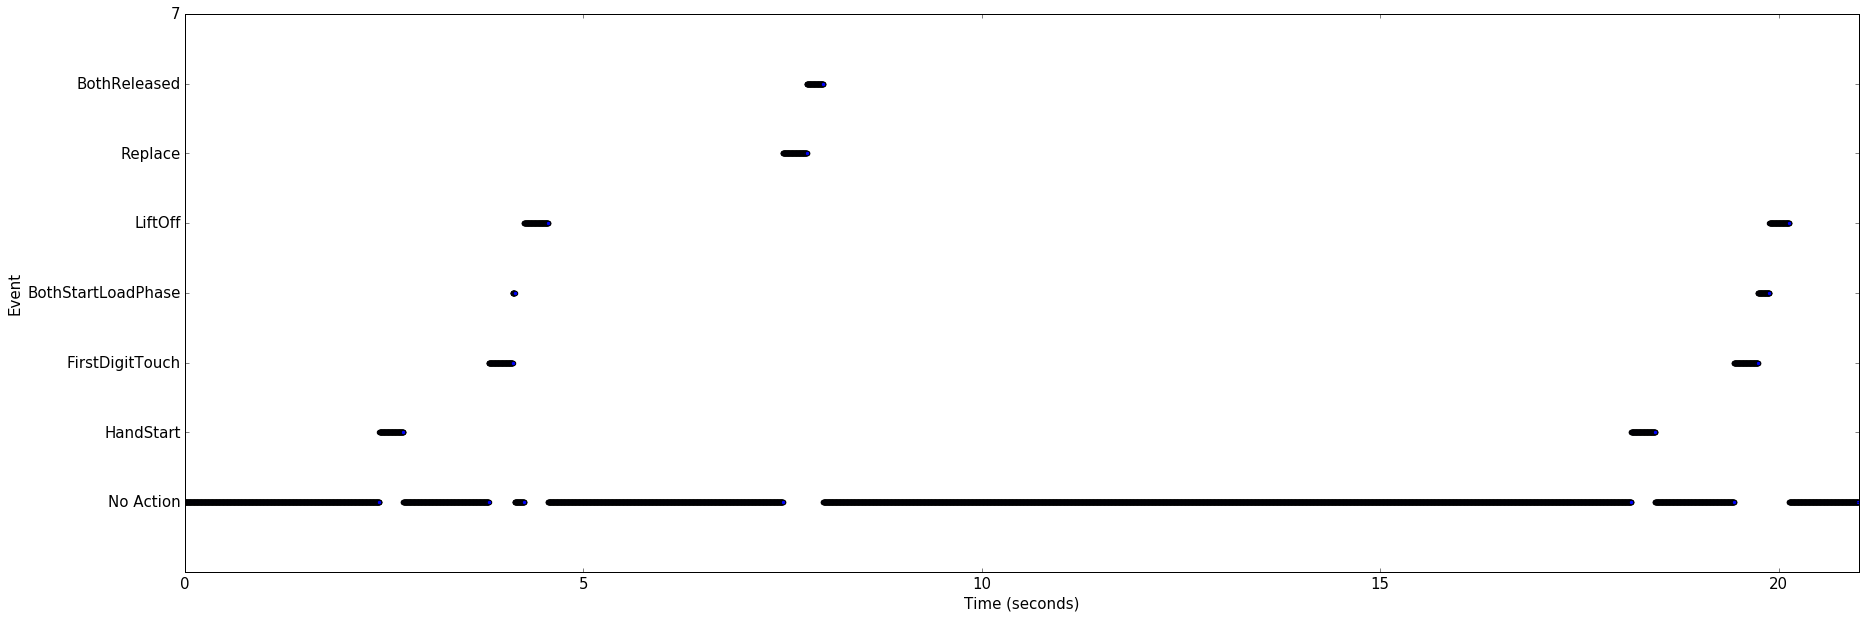

In [18]:
# OK. Let's plot it
sampling_rate = 500.
# prepare the x-axis. We divide by the sampling rate to get time in seconds
x_axis = np.arange(num_samples) / sampling_rate

# make font bigger
matplotlib.rcParams.update({'font.size': 15})

# full time series
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis, labels)
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.xlim(0, x_axis[-1] + 1)
locations = range(8)
names = ["No Action", "HandStart", "FirstDigitTouch", "BothStartLoadPhase", "LiftOff", "Replace", "BothReleased", "7"]
plt.yticks(locations, names)
plt.show()
plt.close()

# the first 21 seconds
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis[:10500], labels[:10500])
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.yticks(locations, names)
plt.xlim(0, 21)
plt.show()
plt.close()


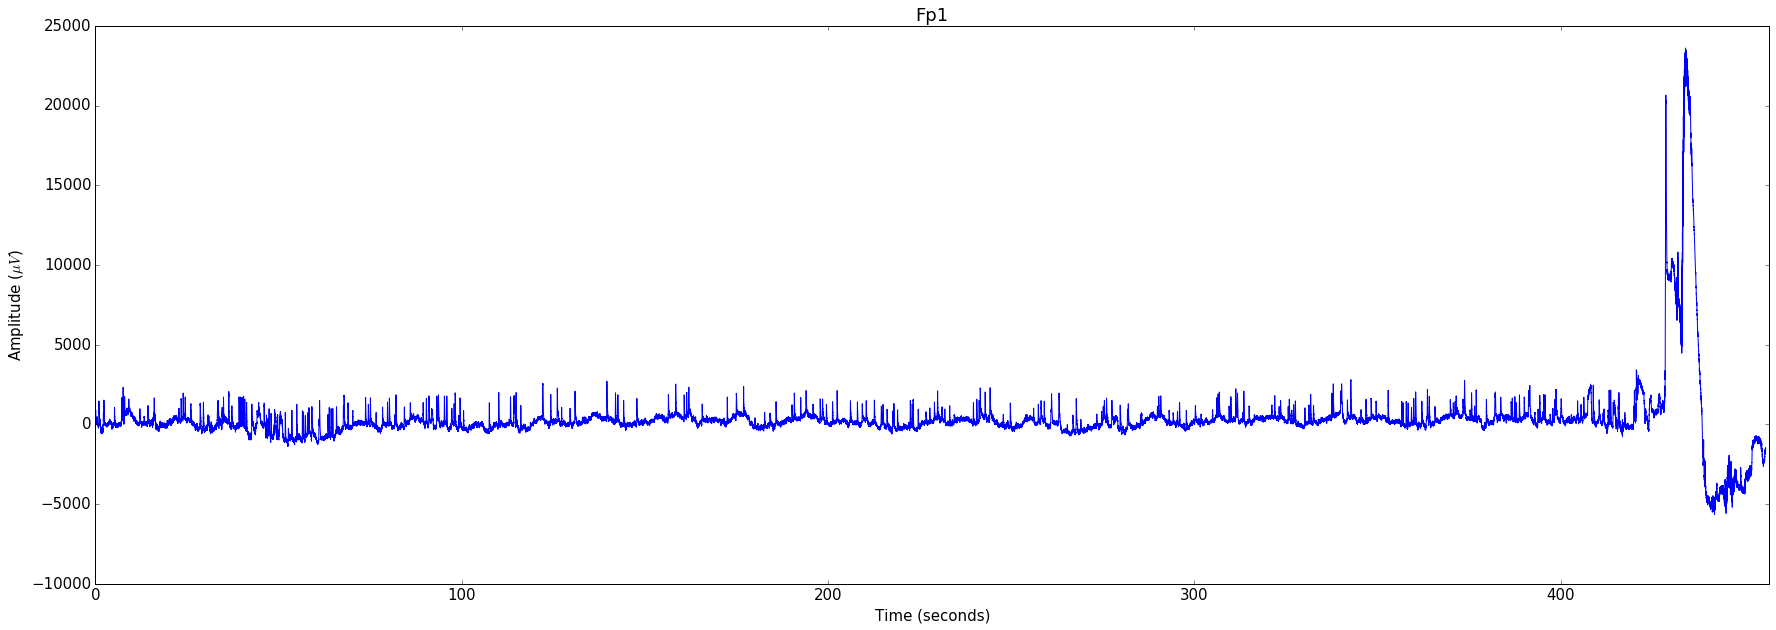

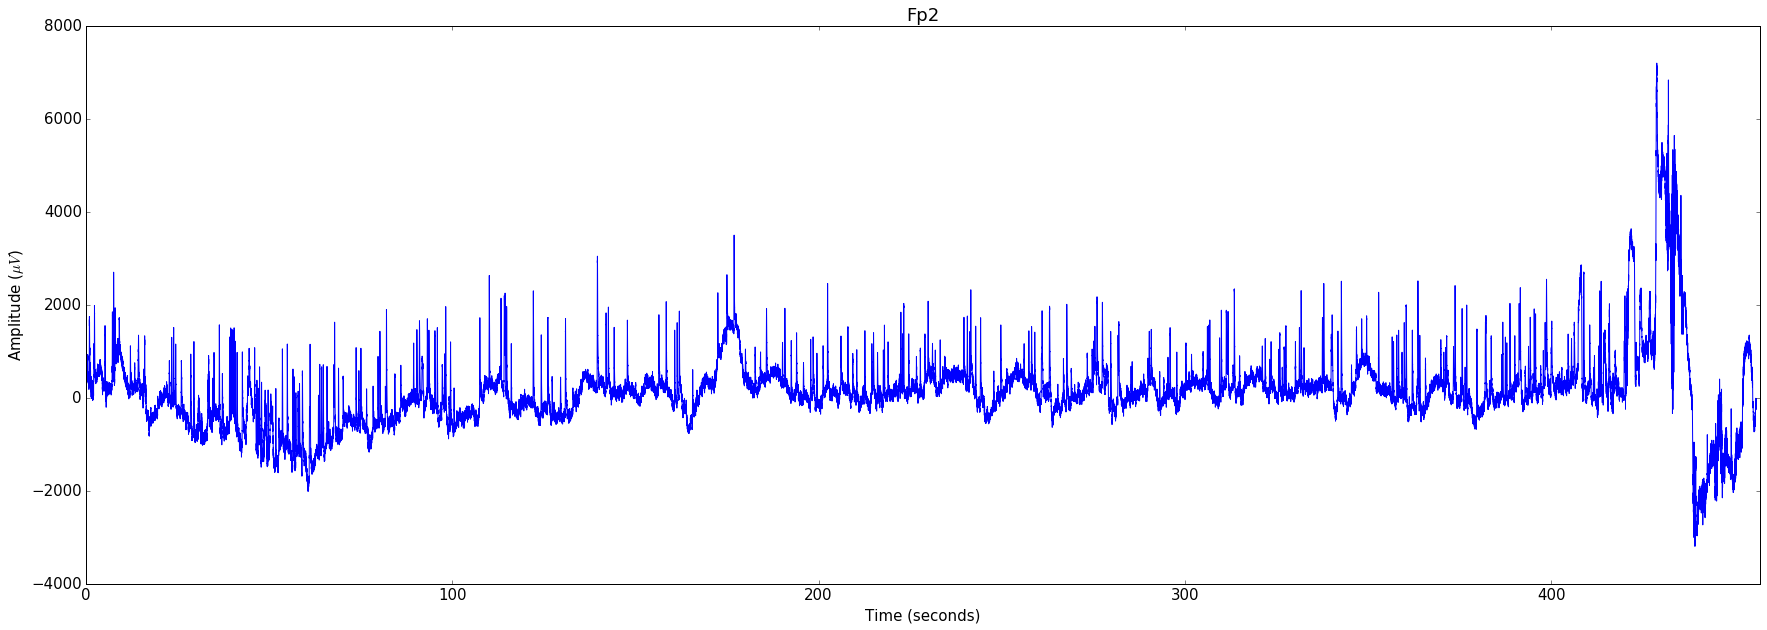

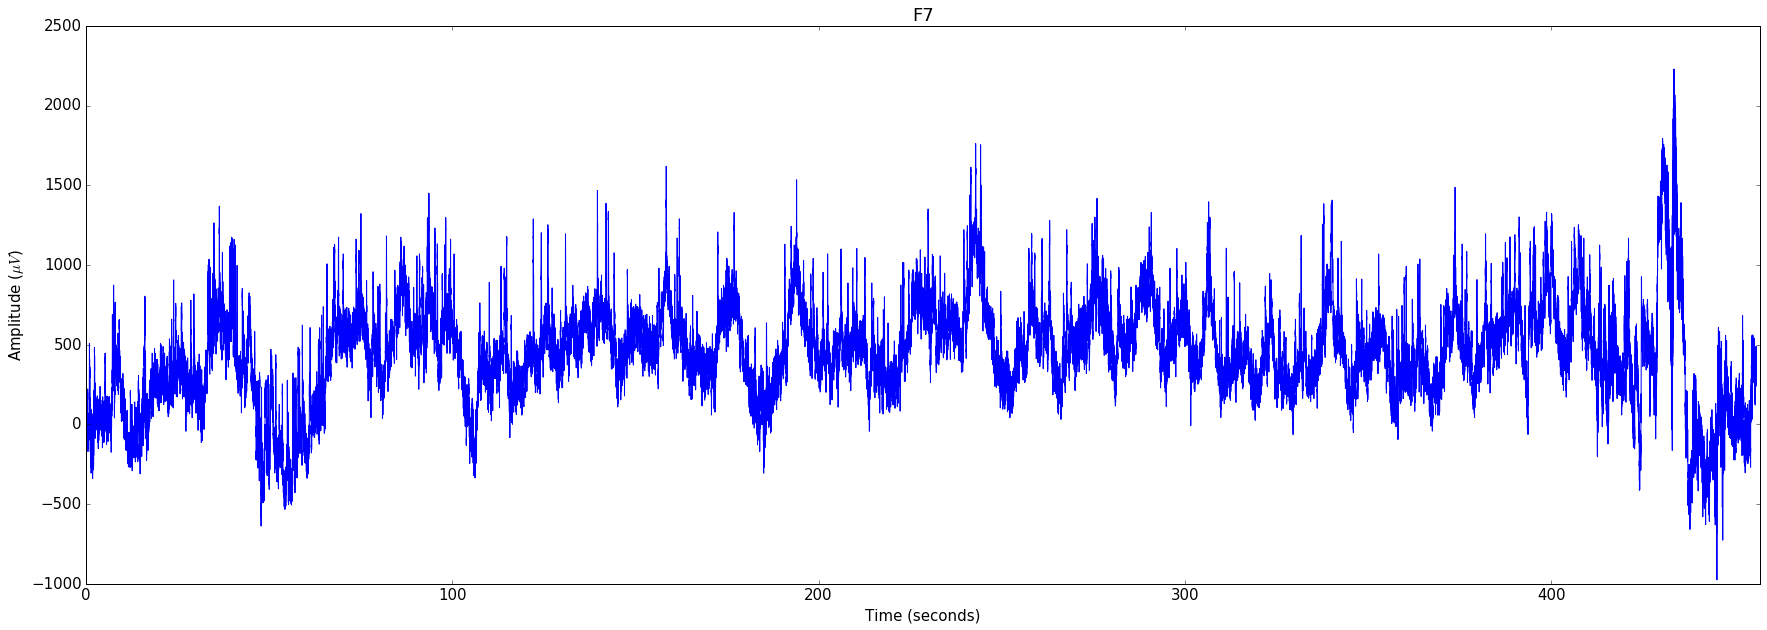

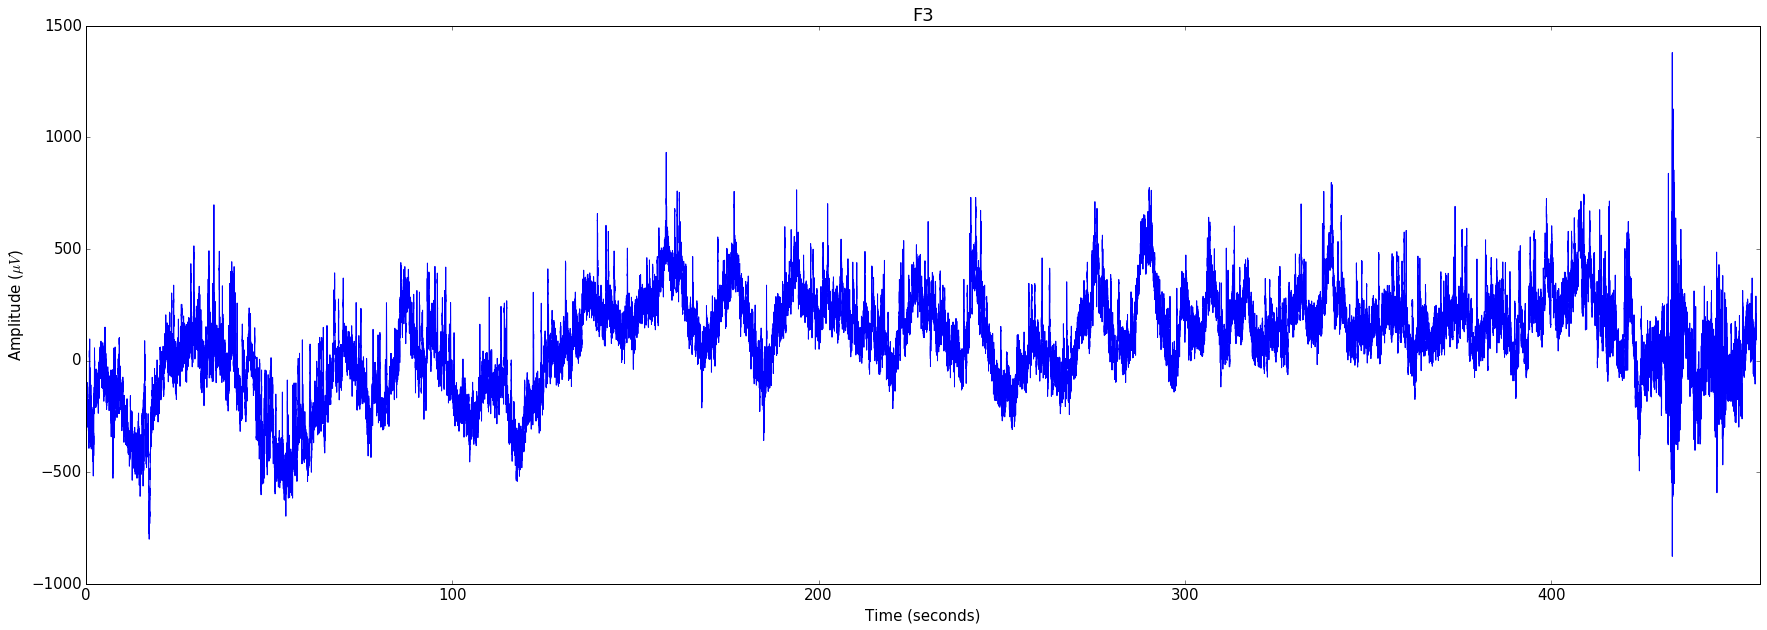

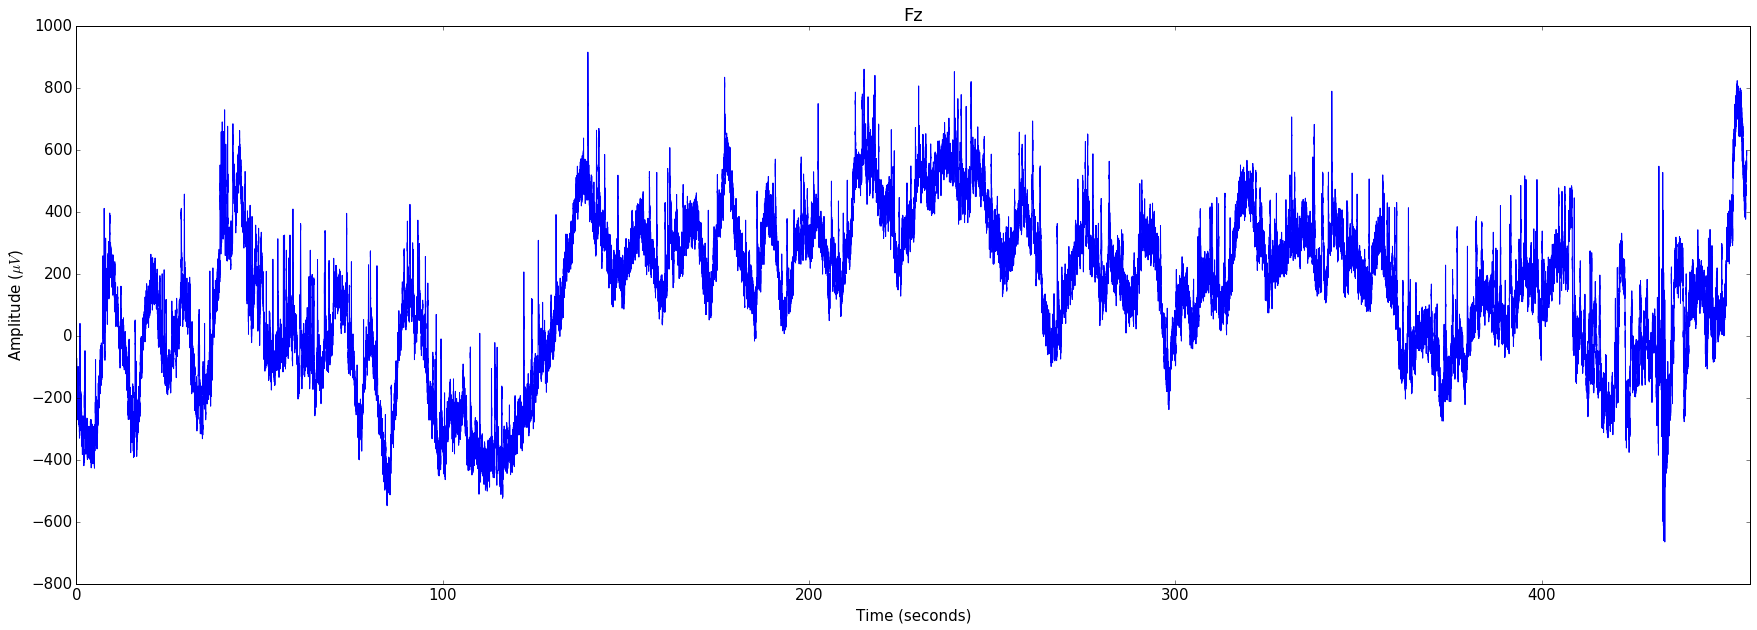

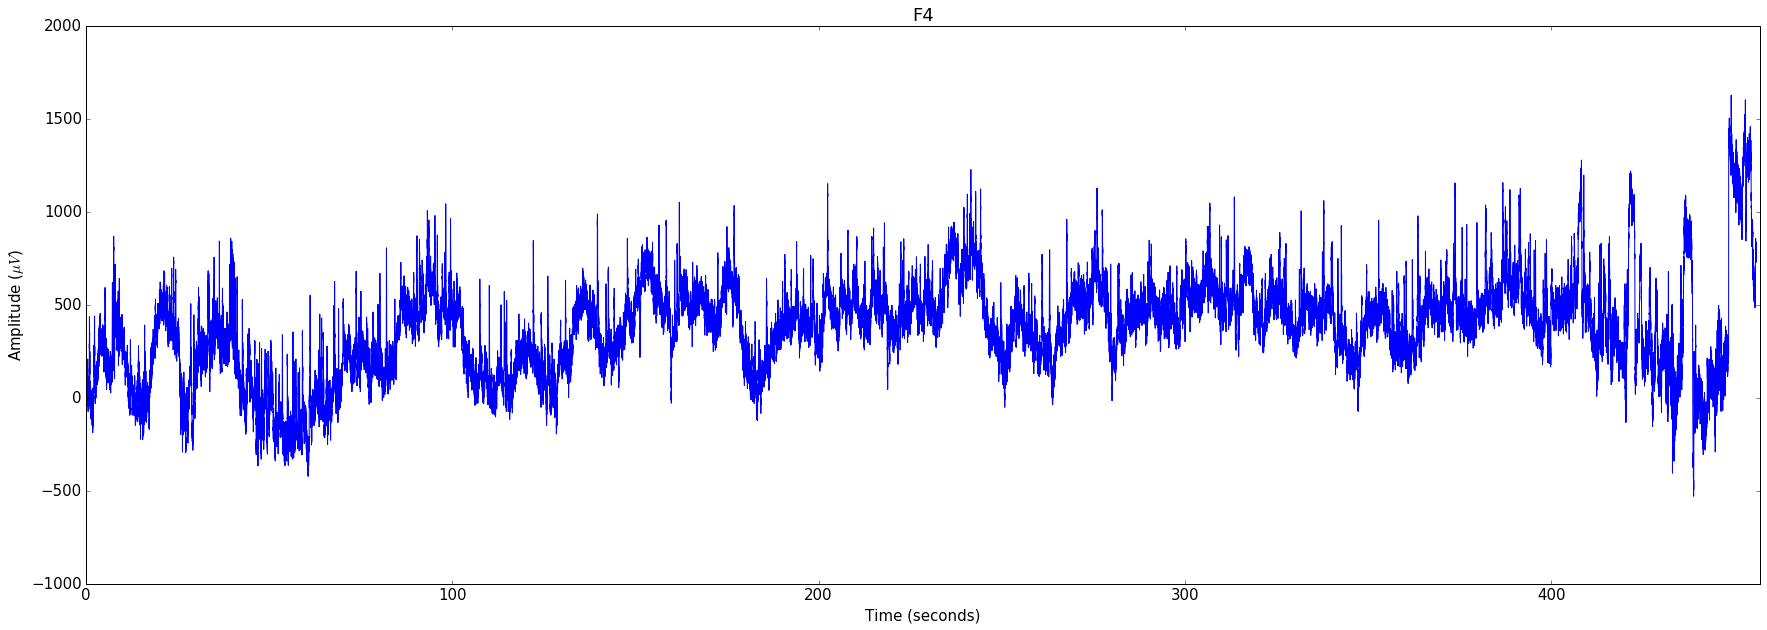

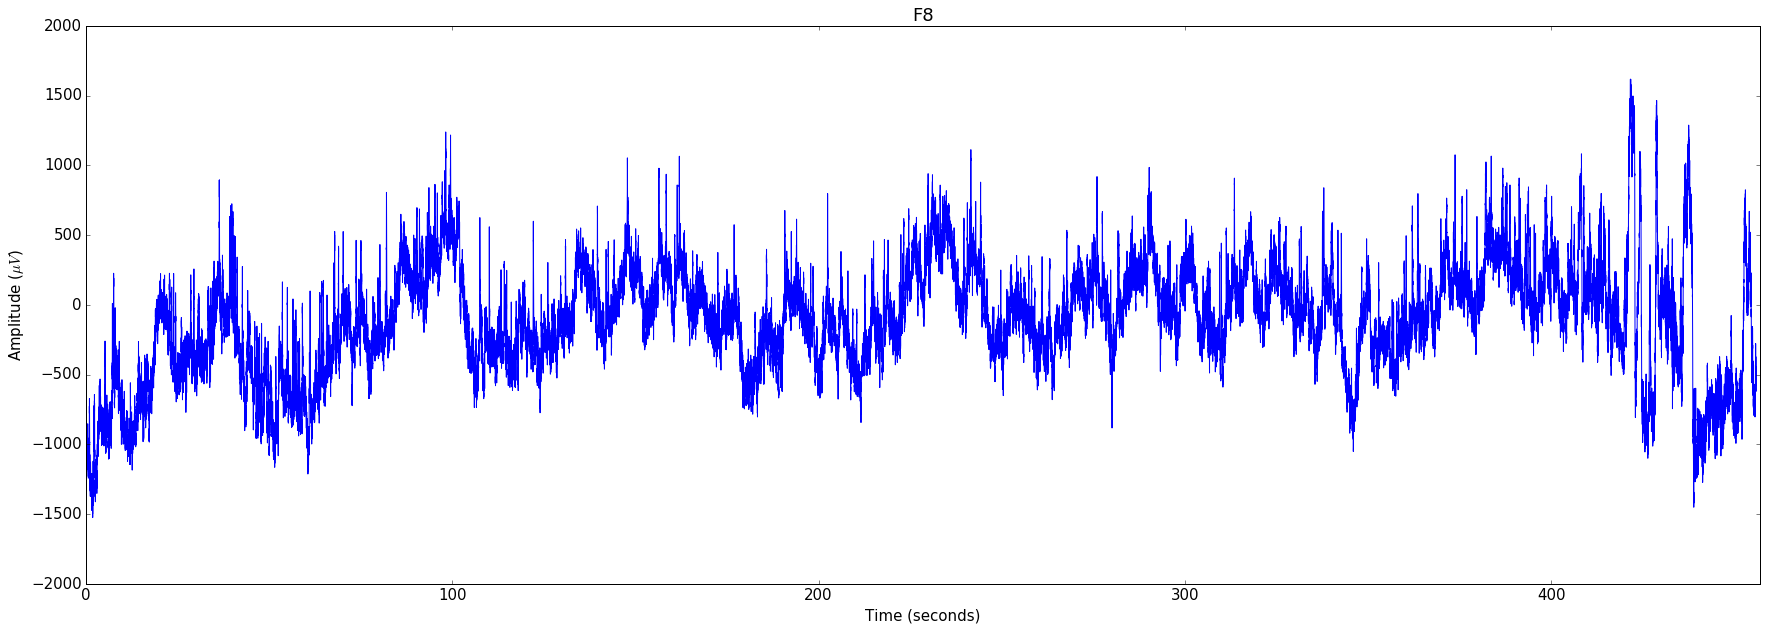

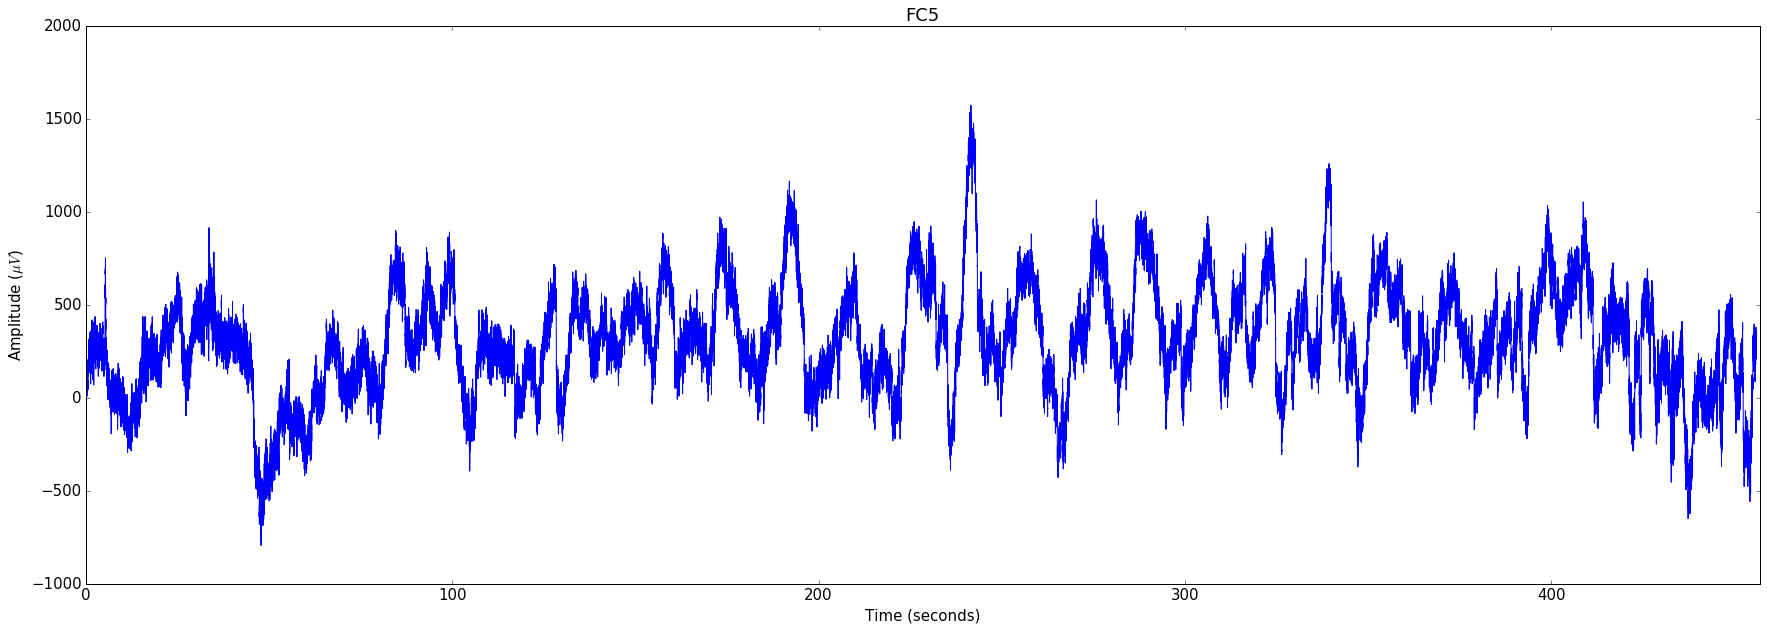

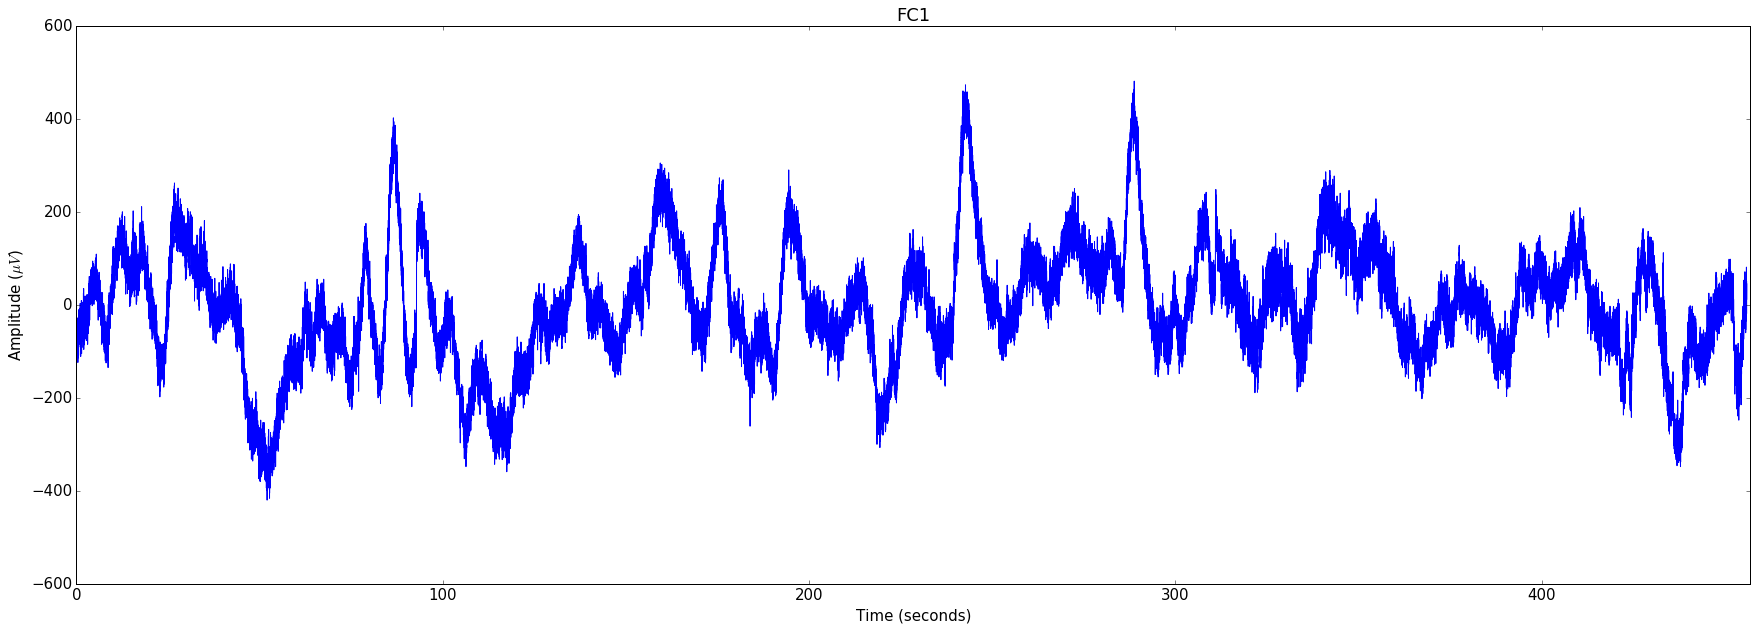

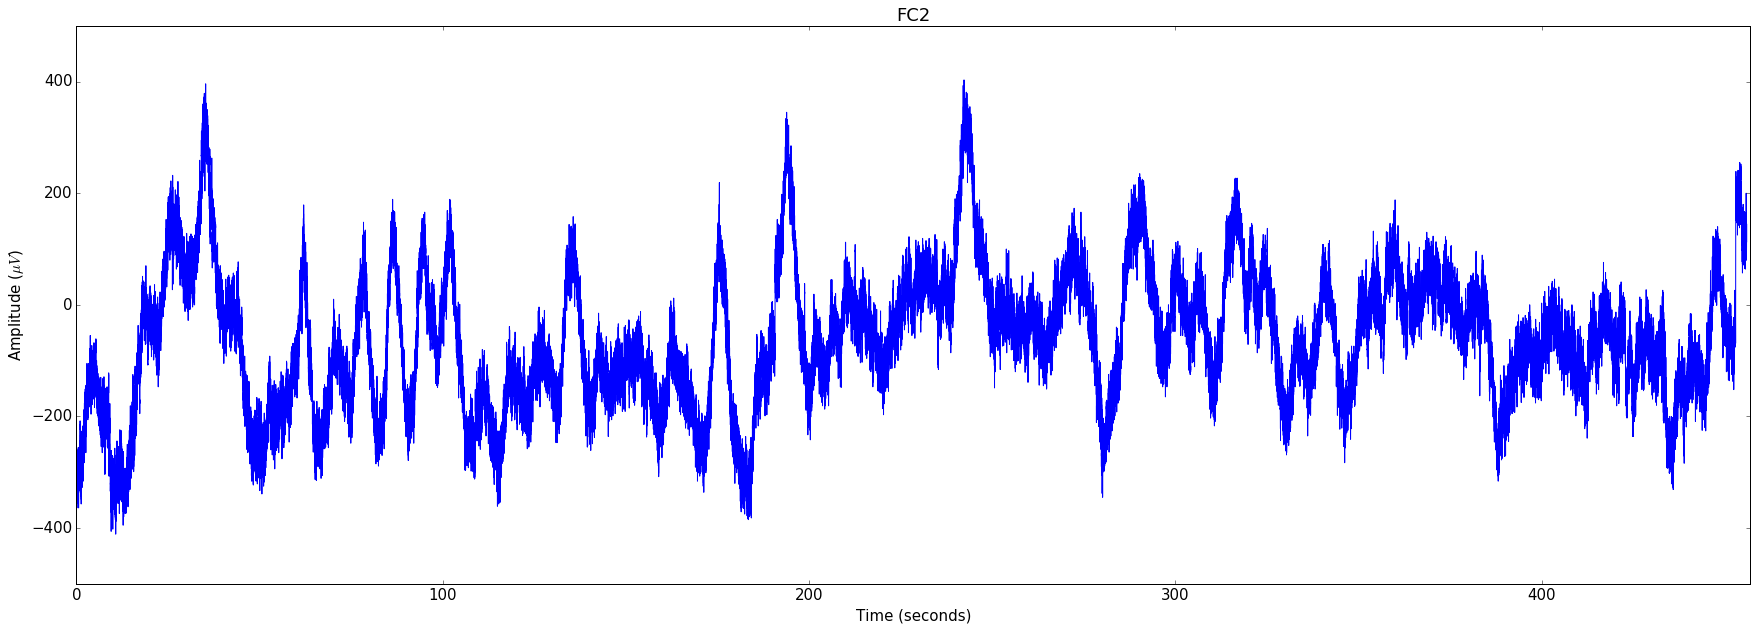

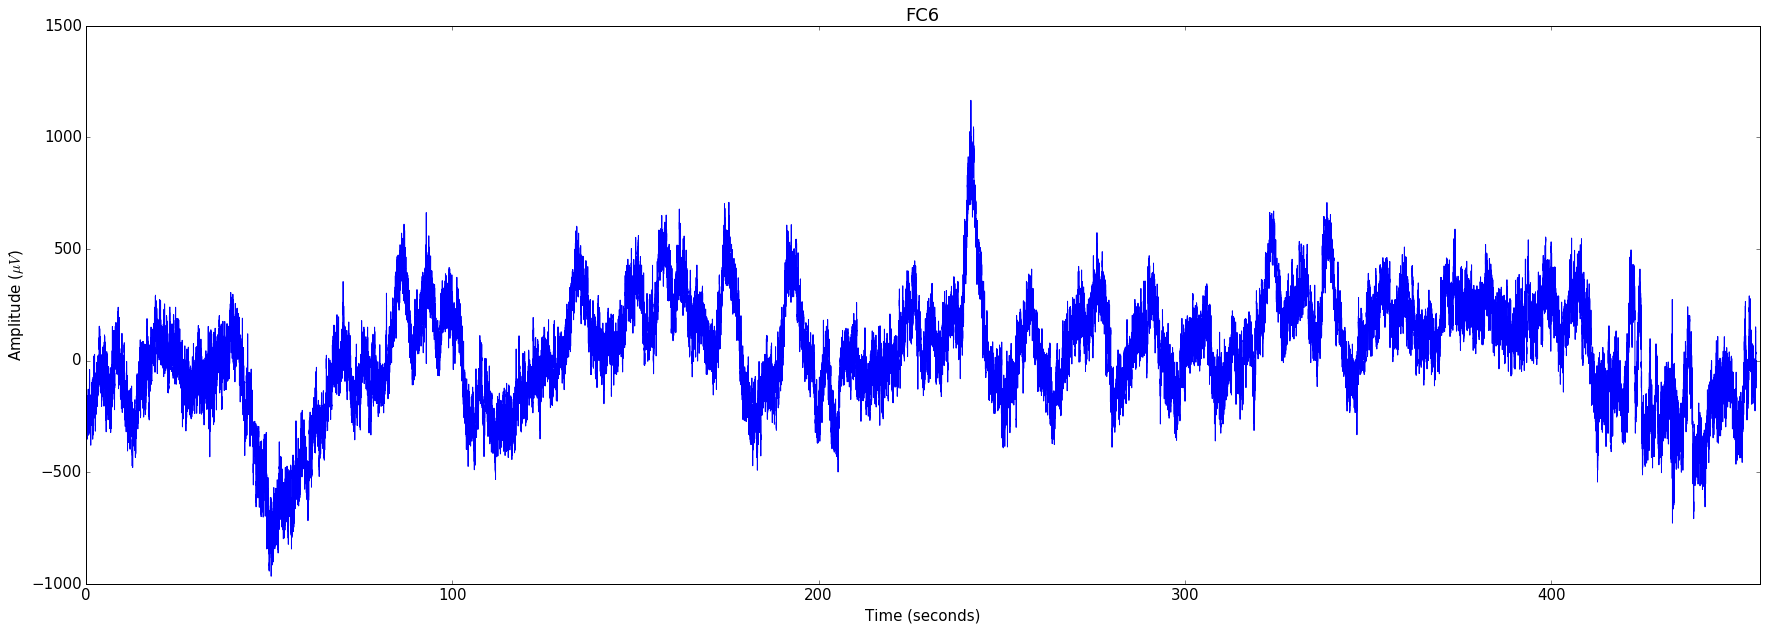

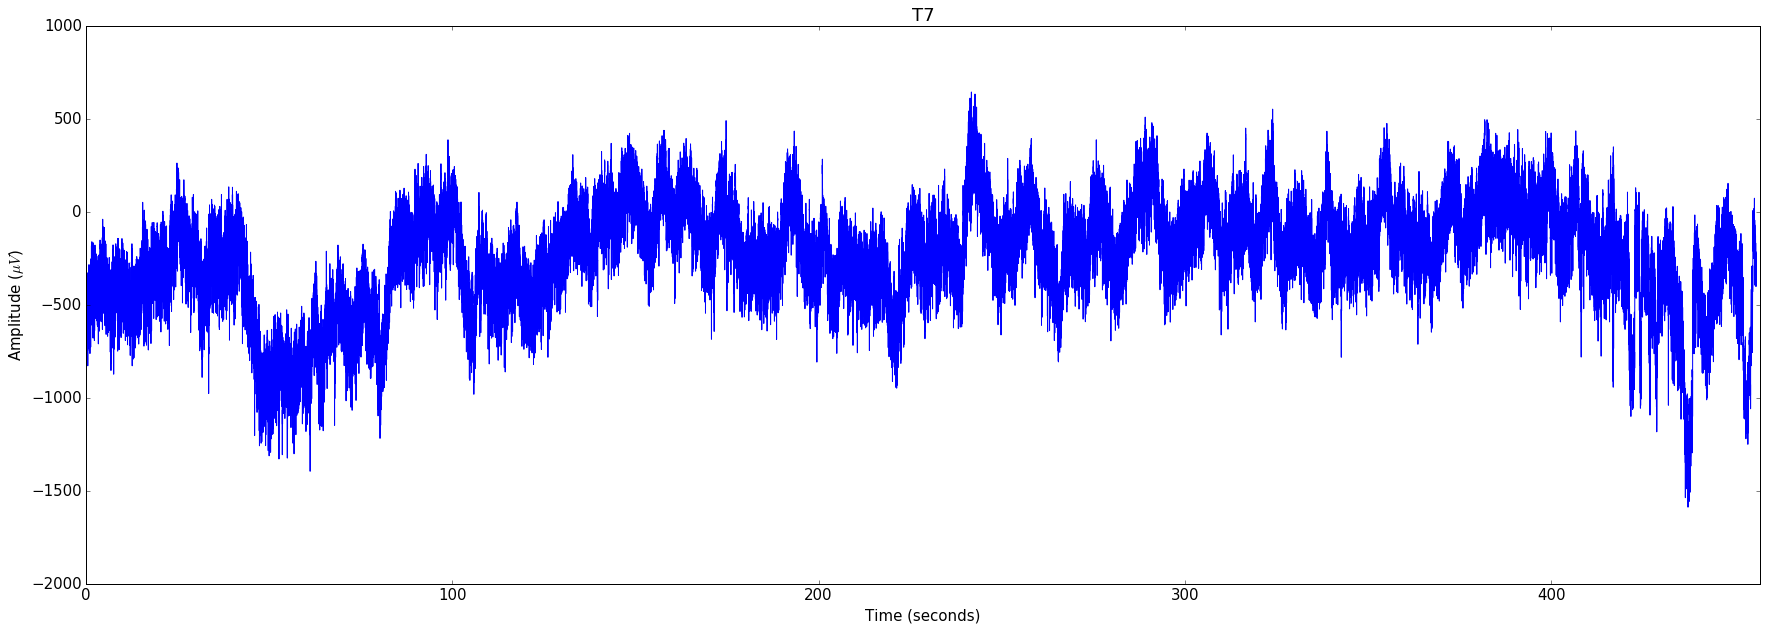

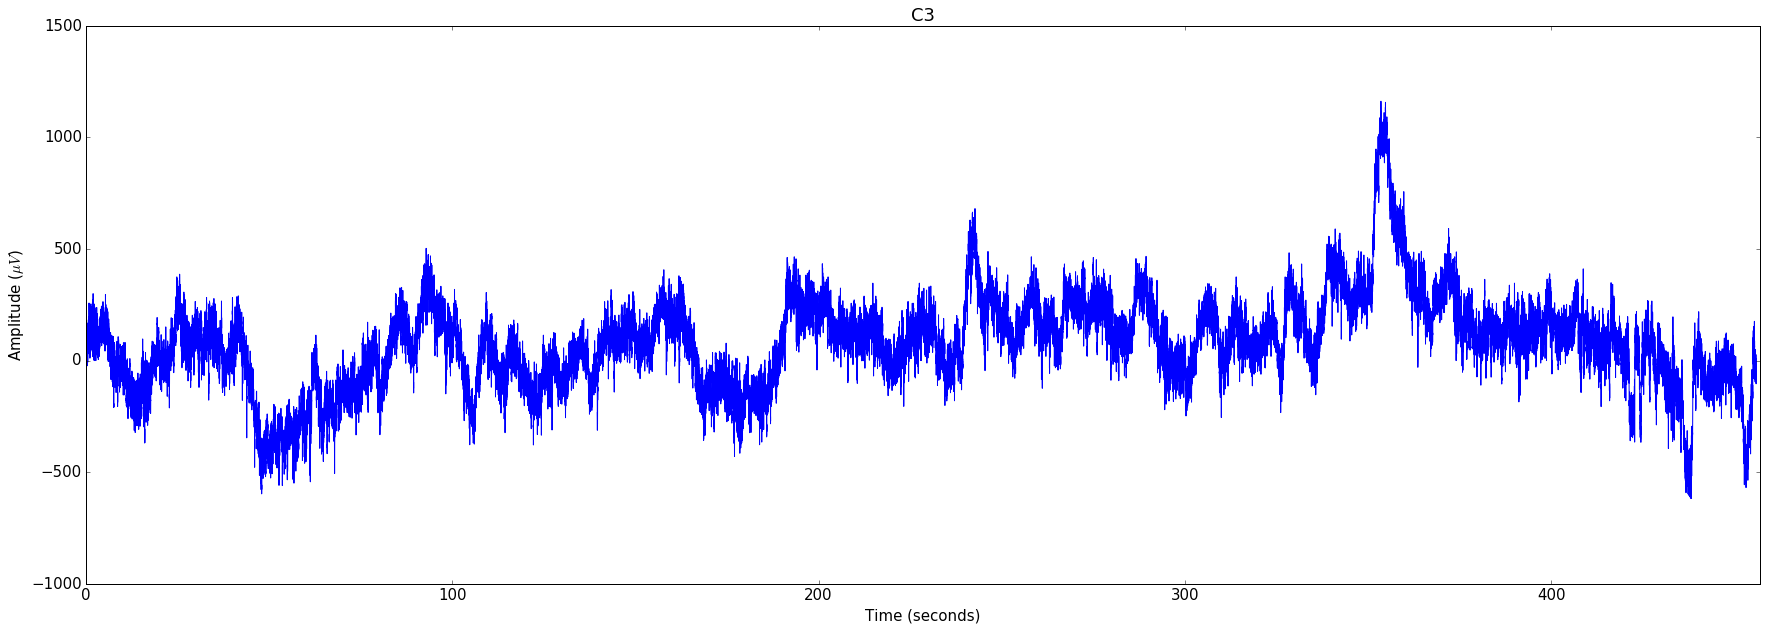

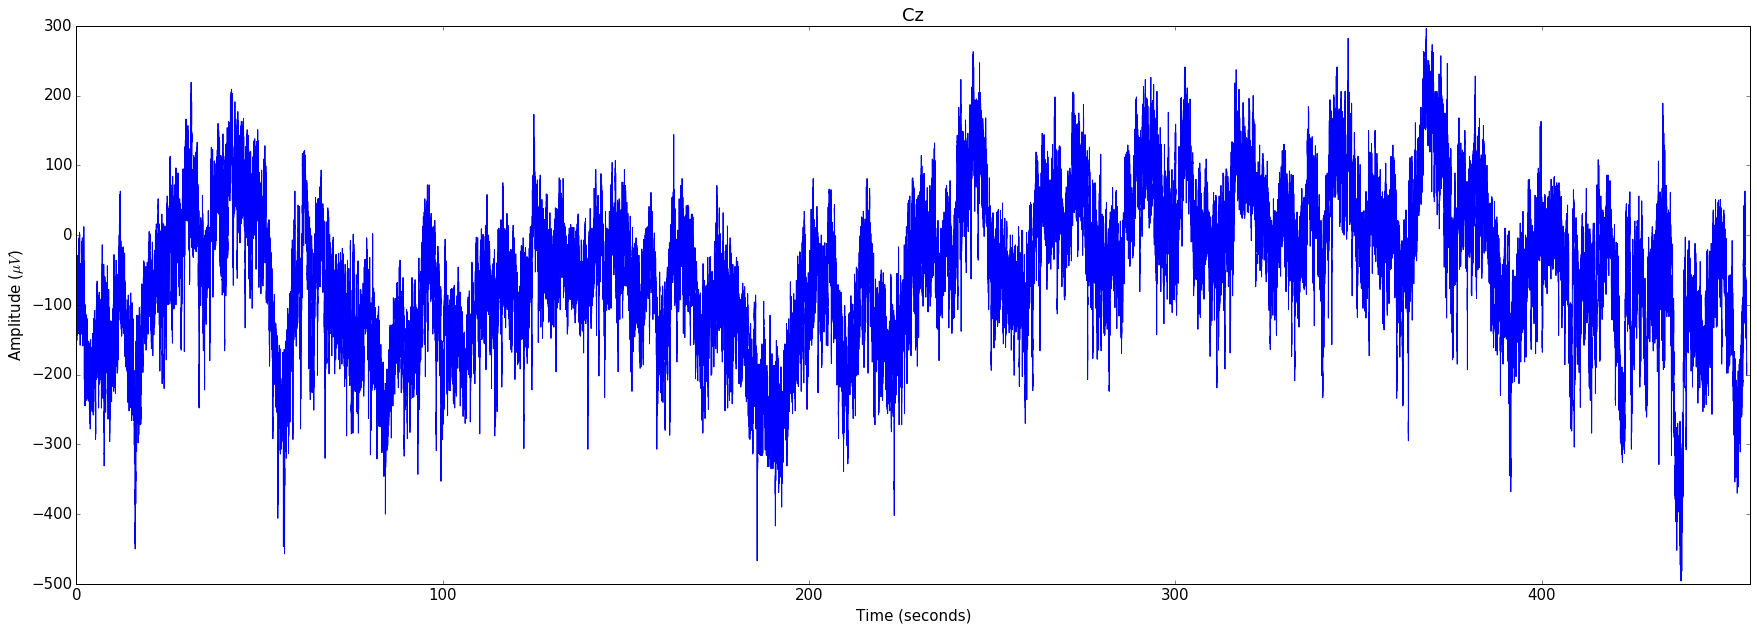

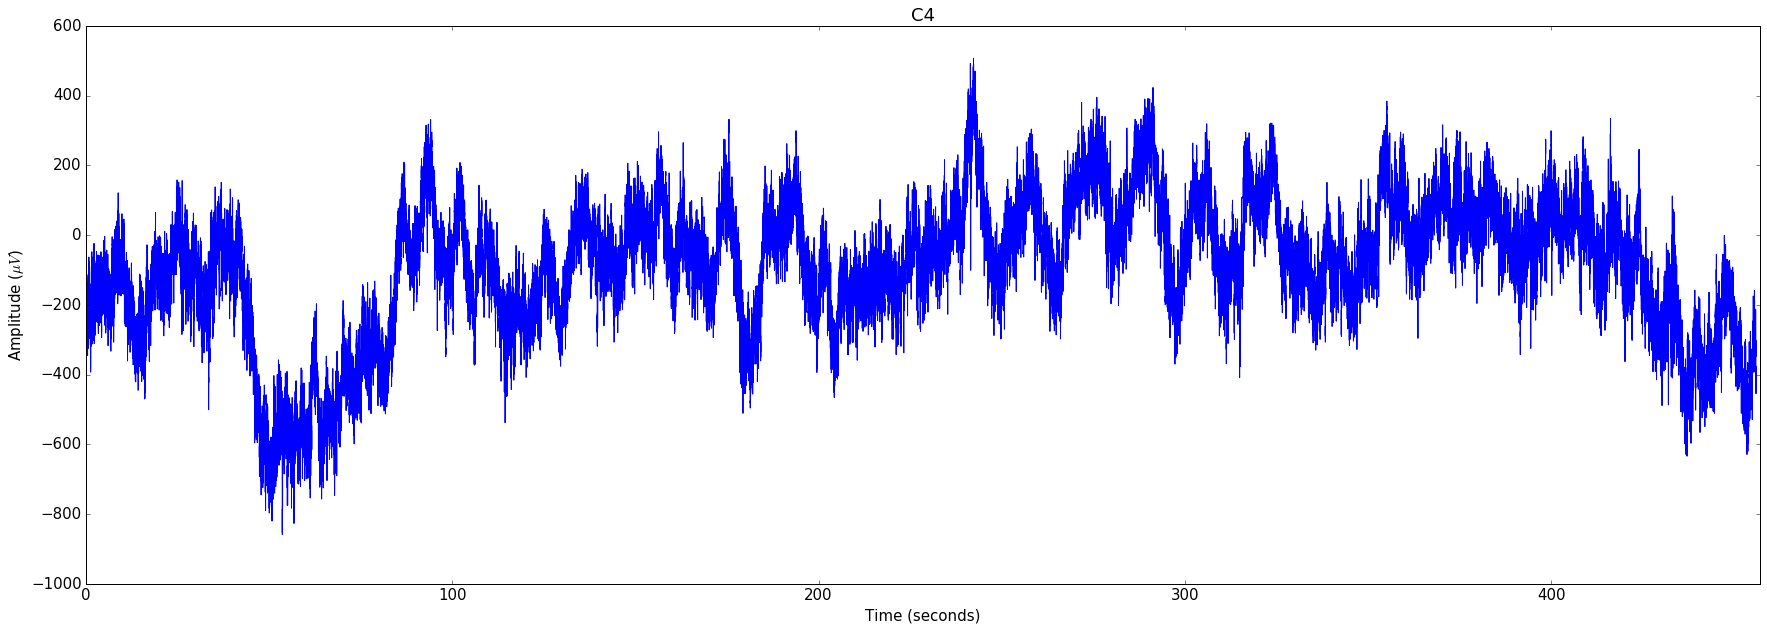

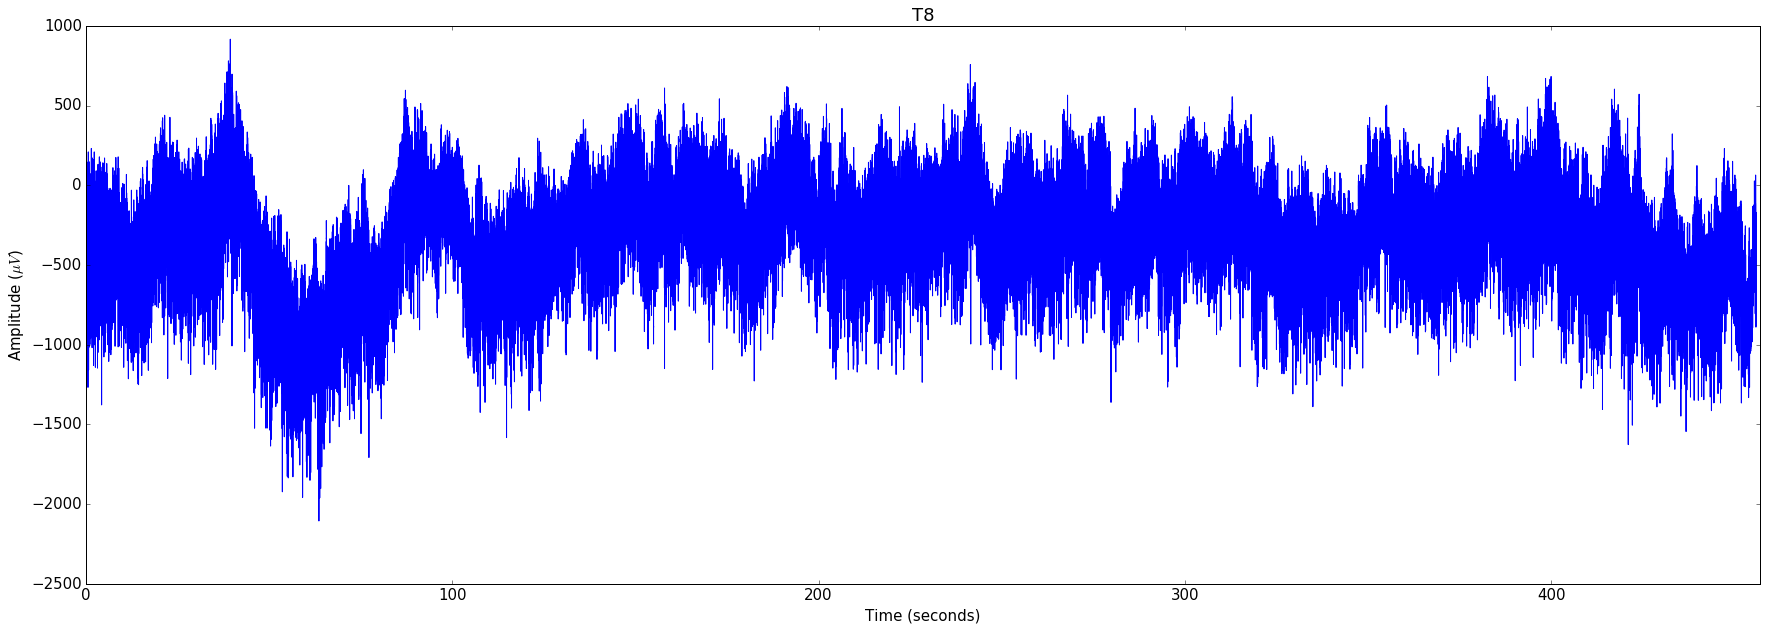

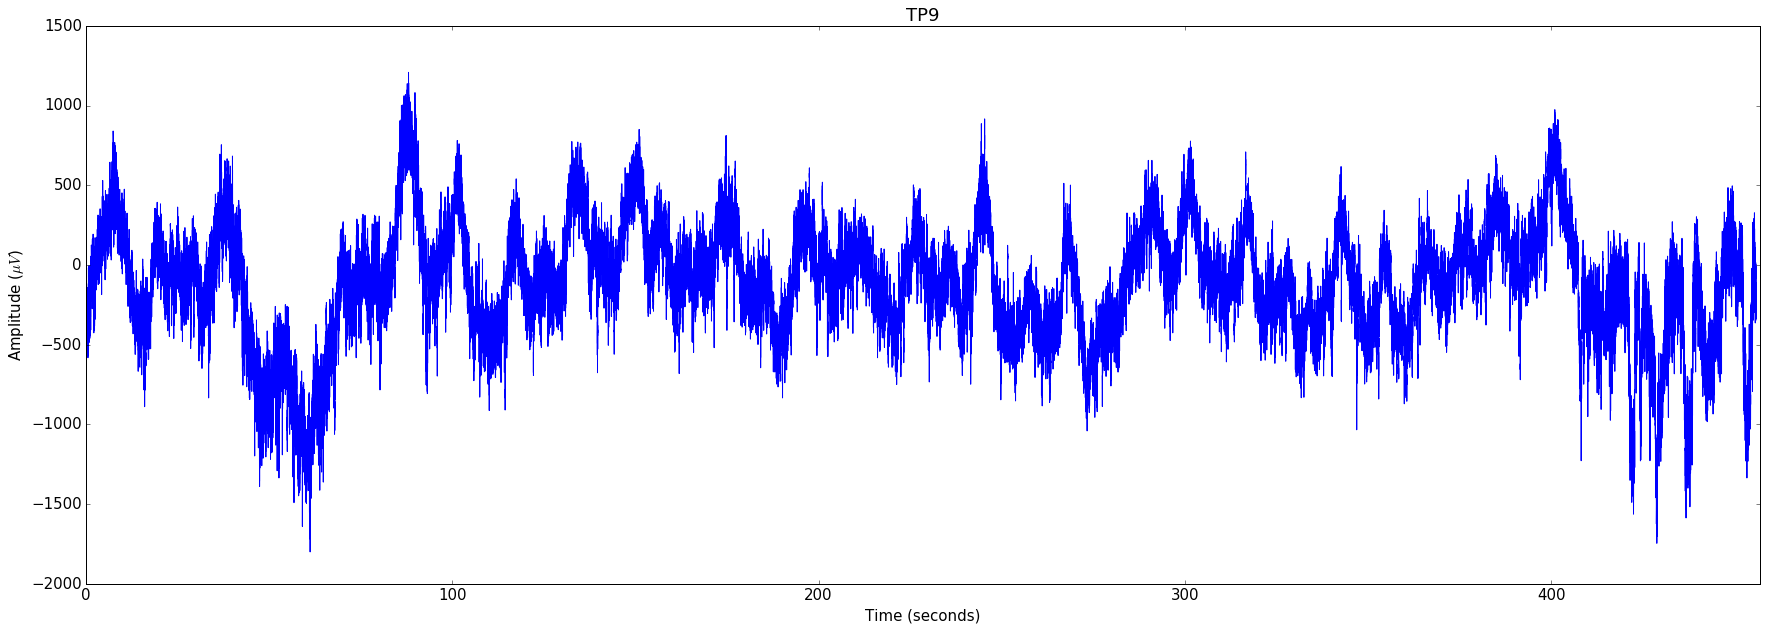

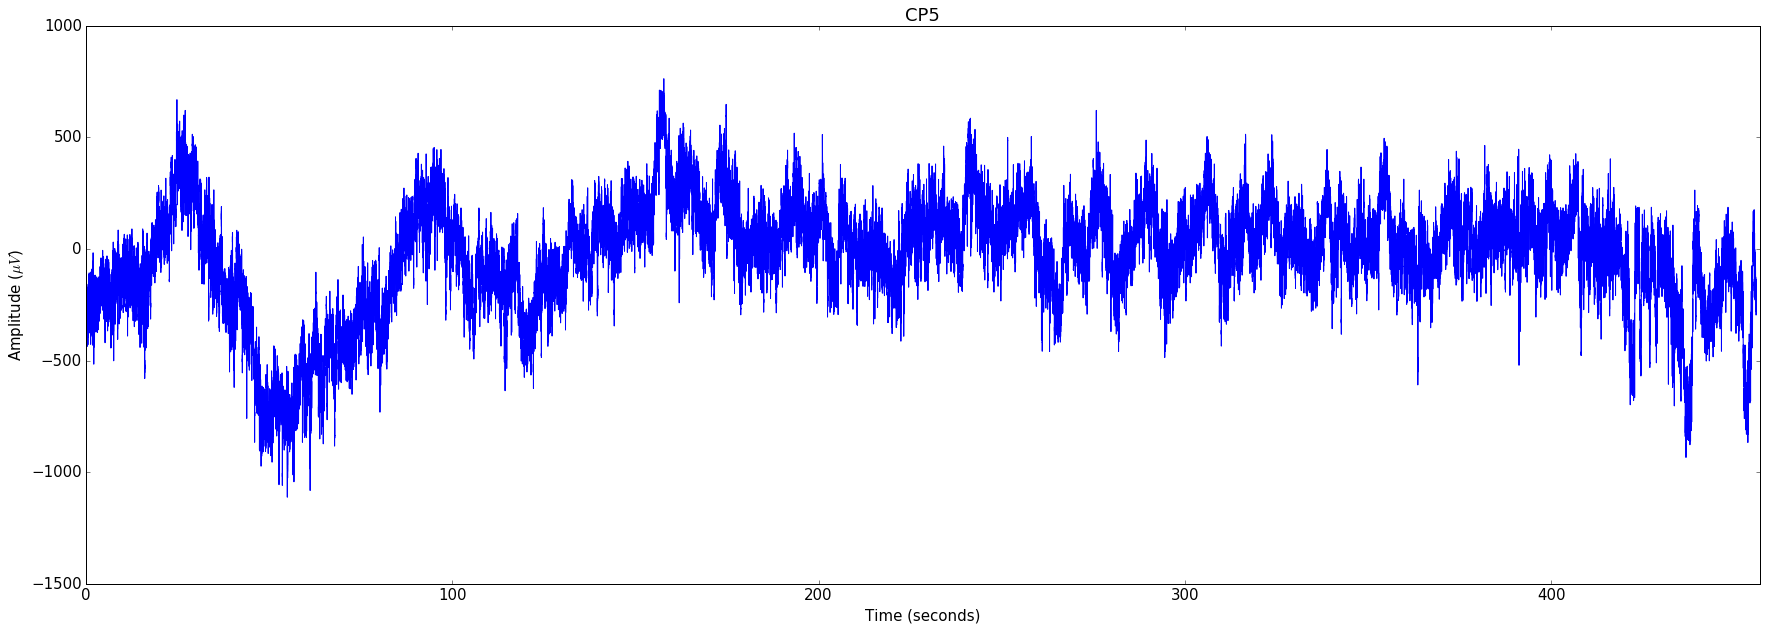

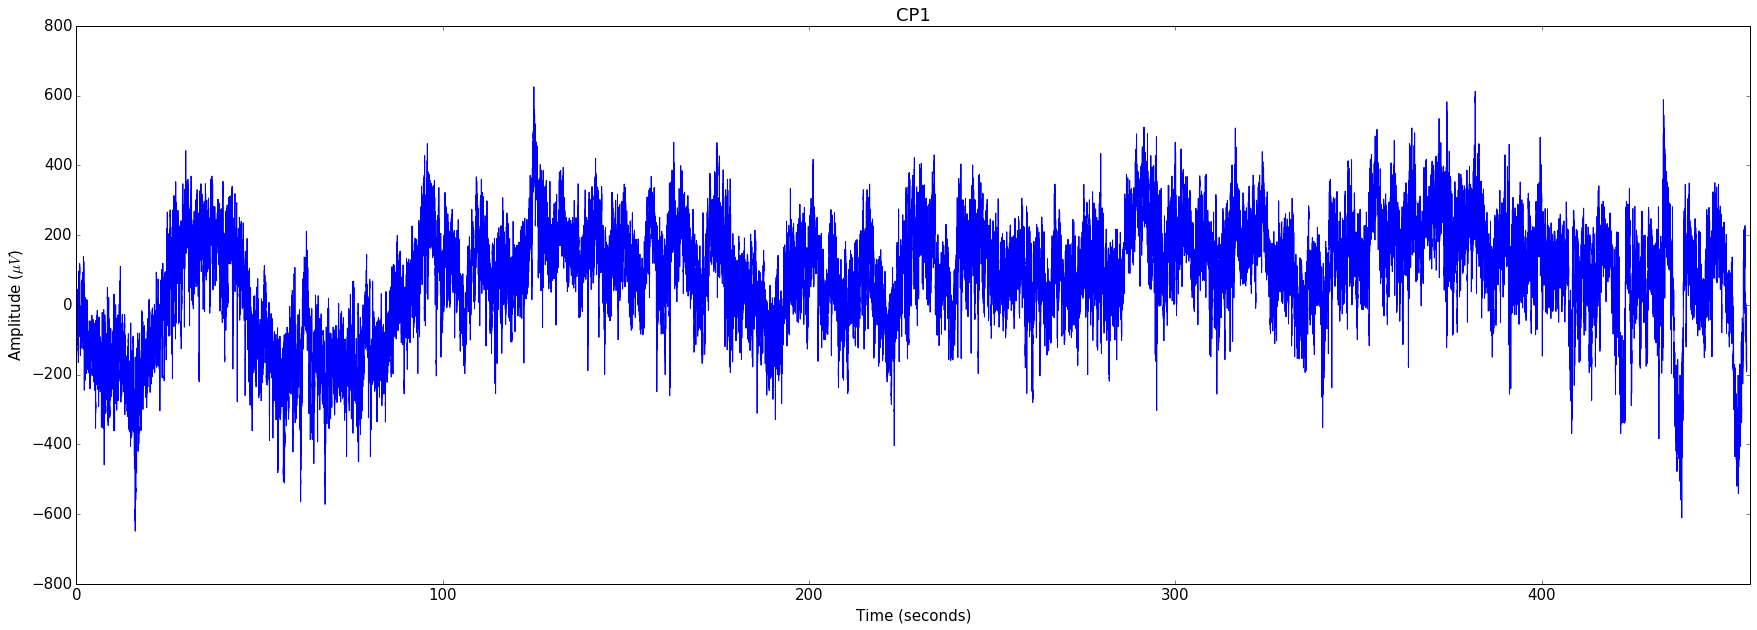

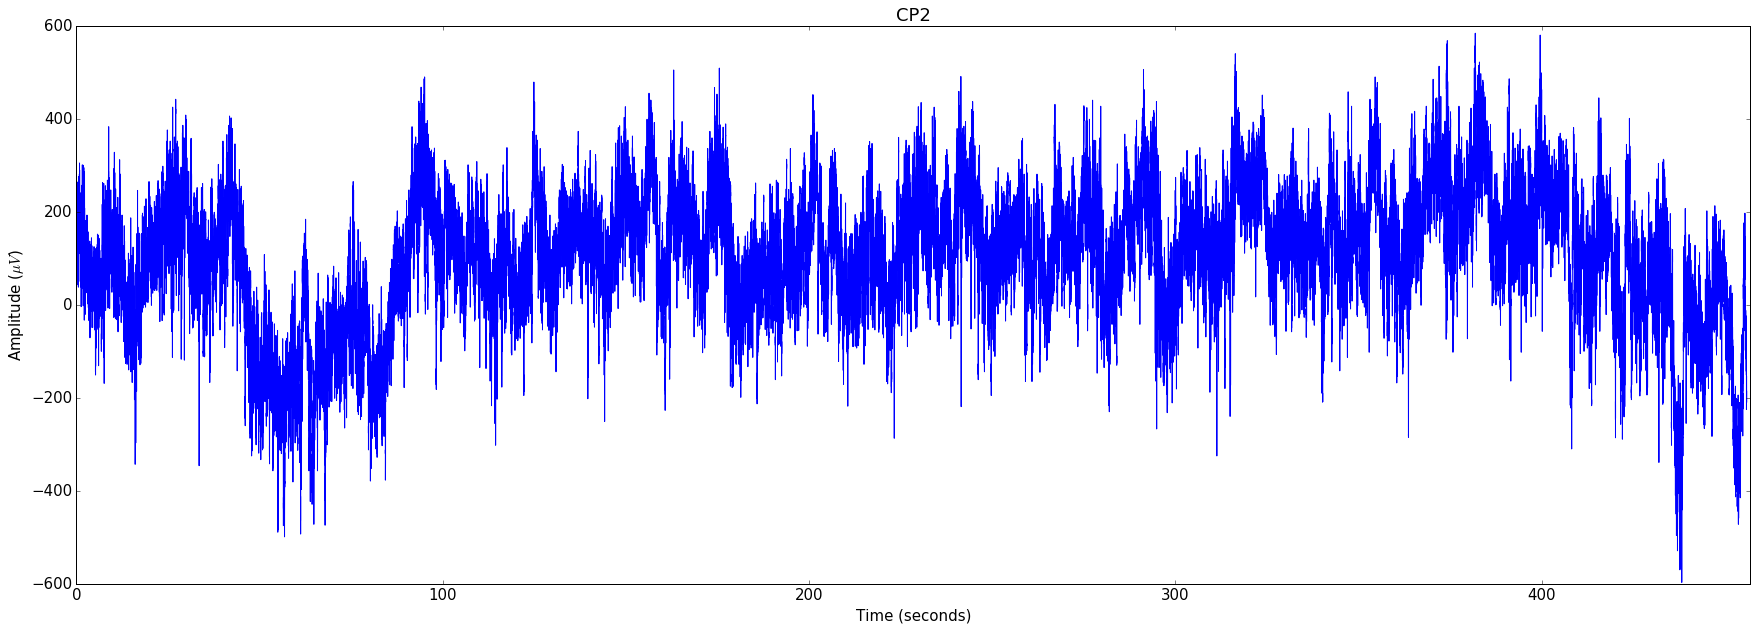

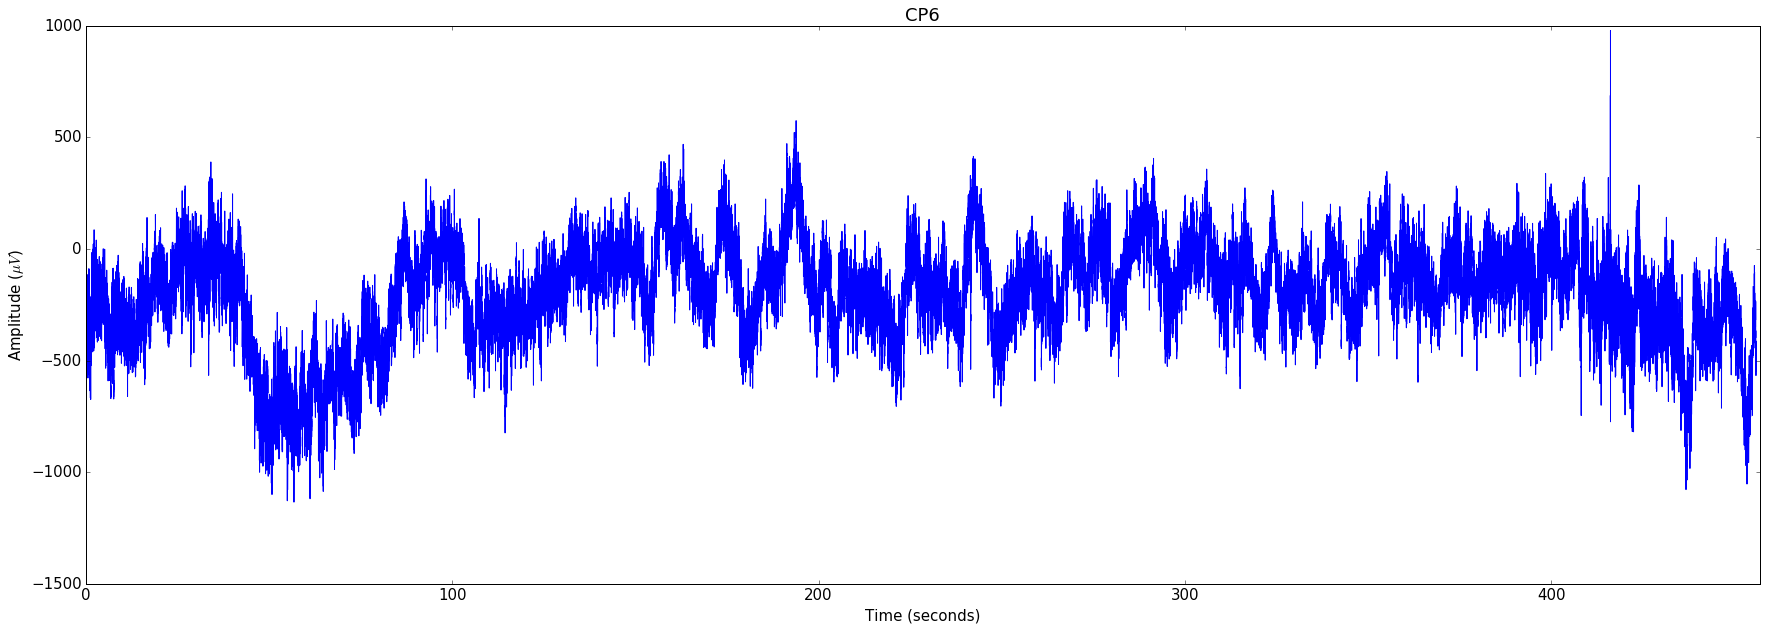

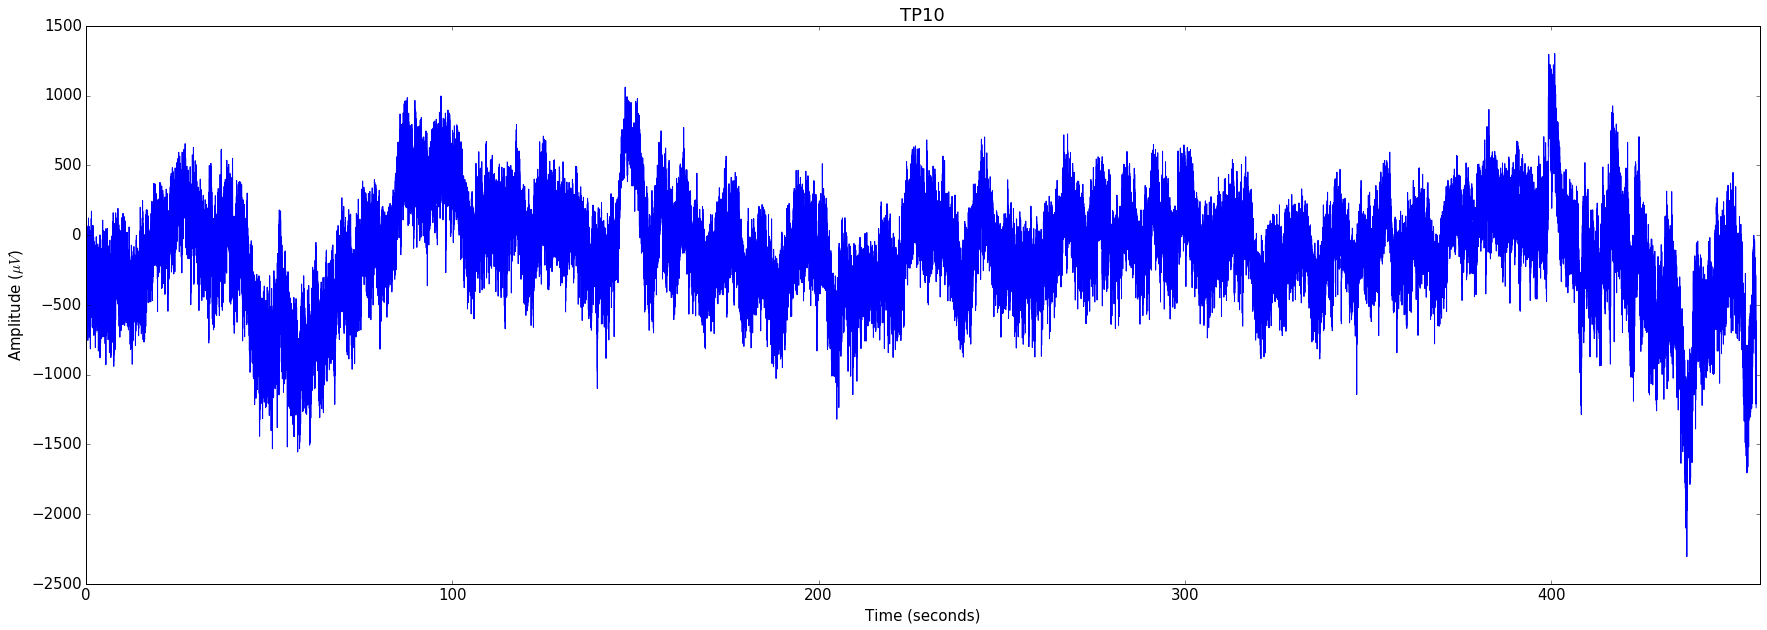

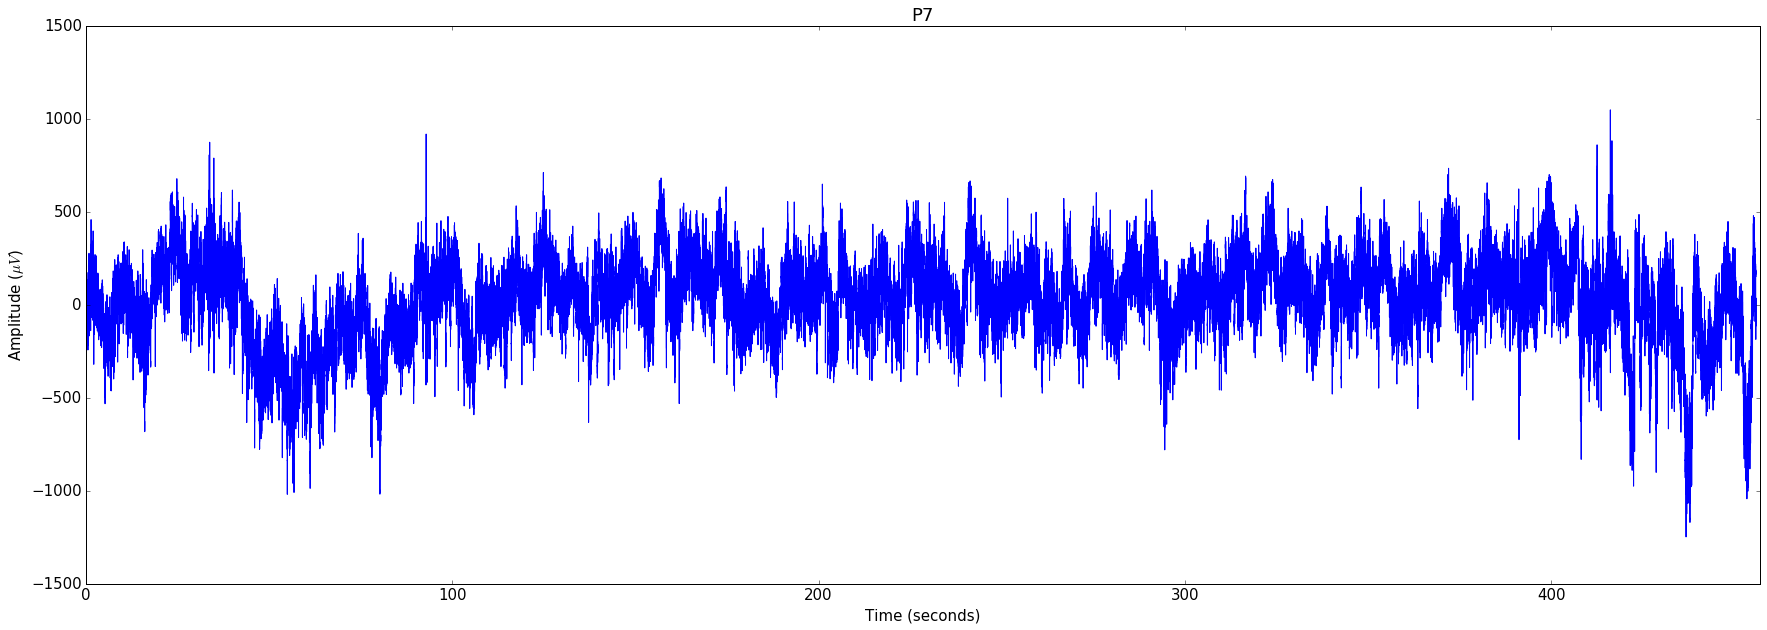

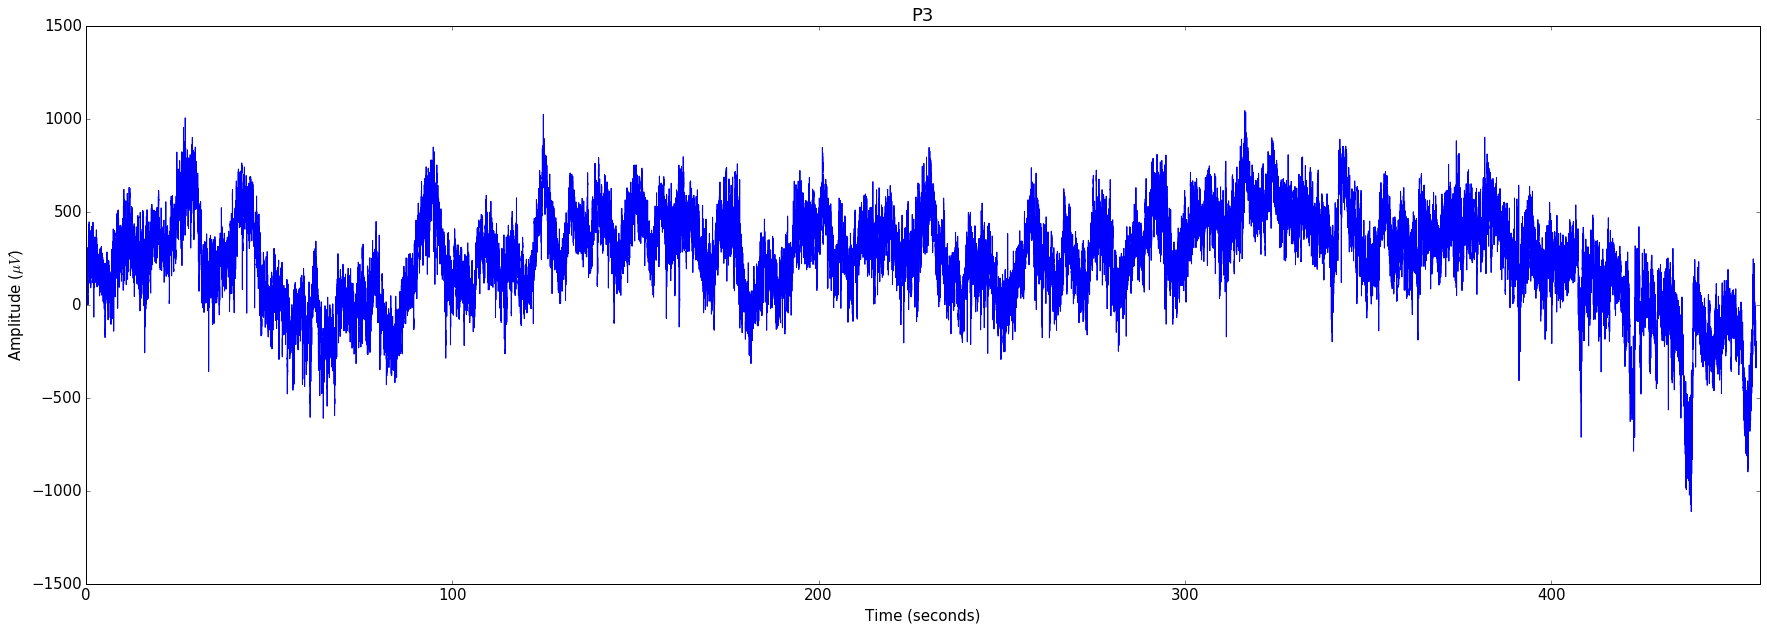

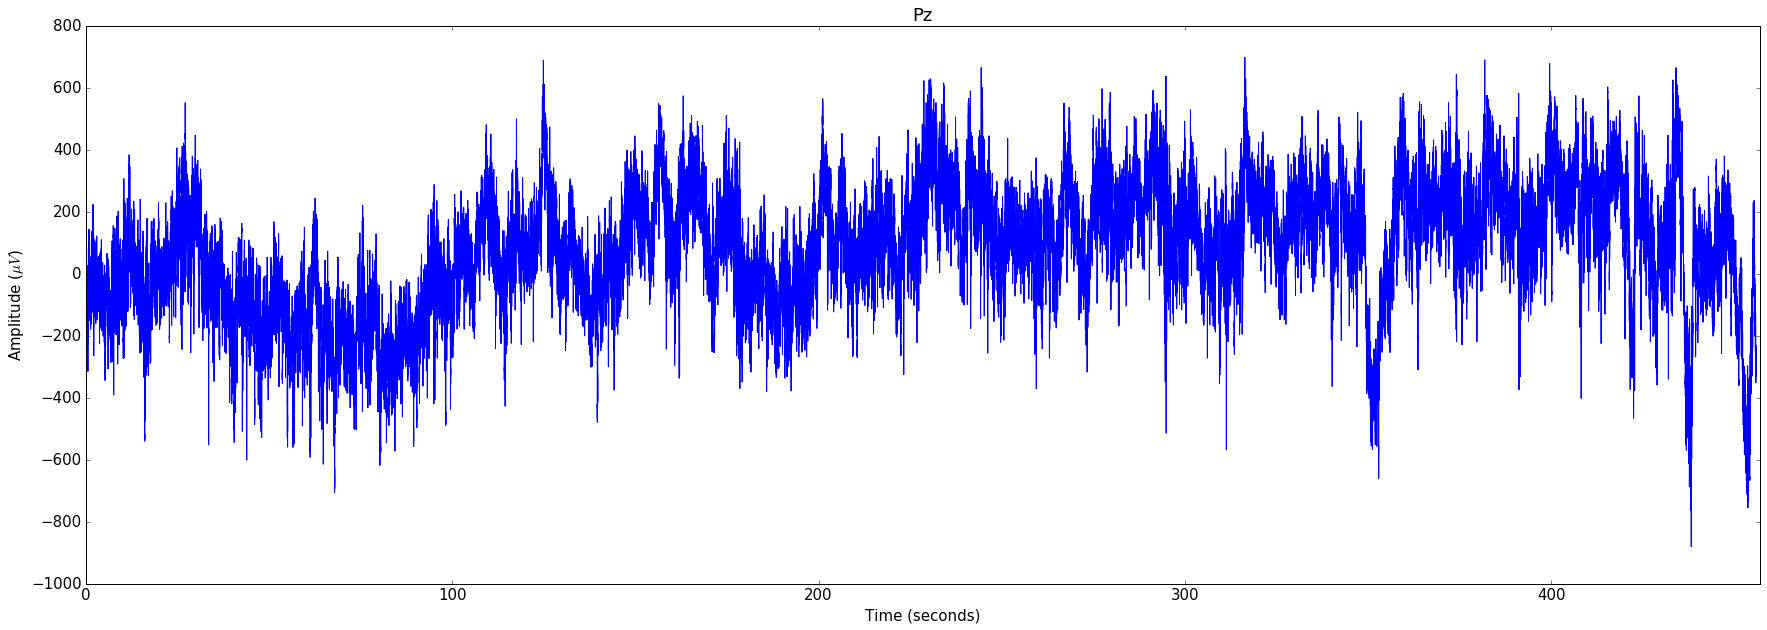

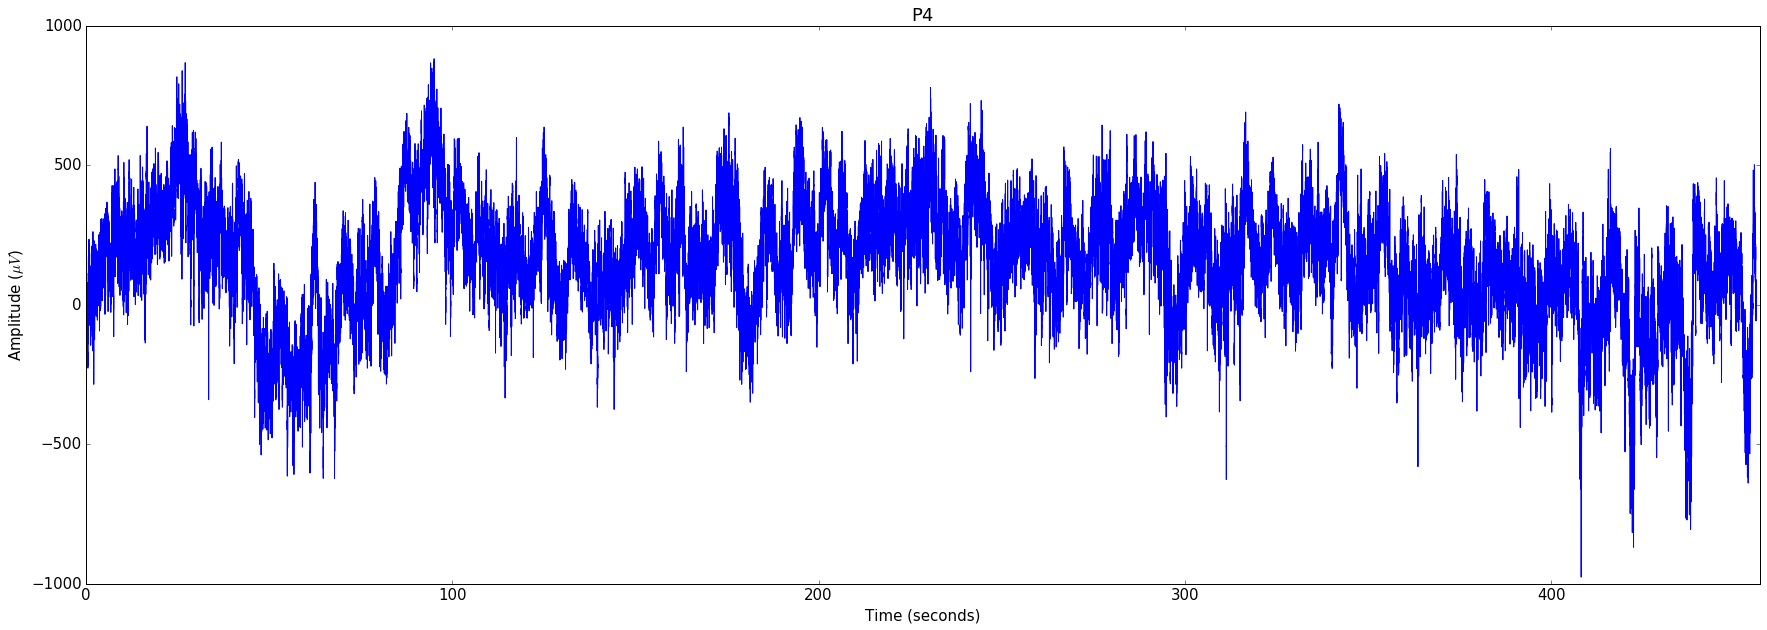

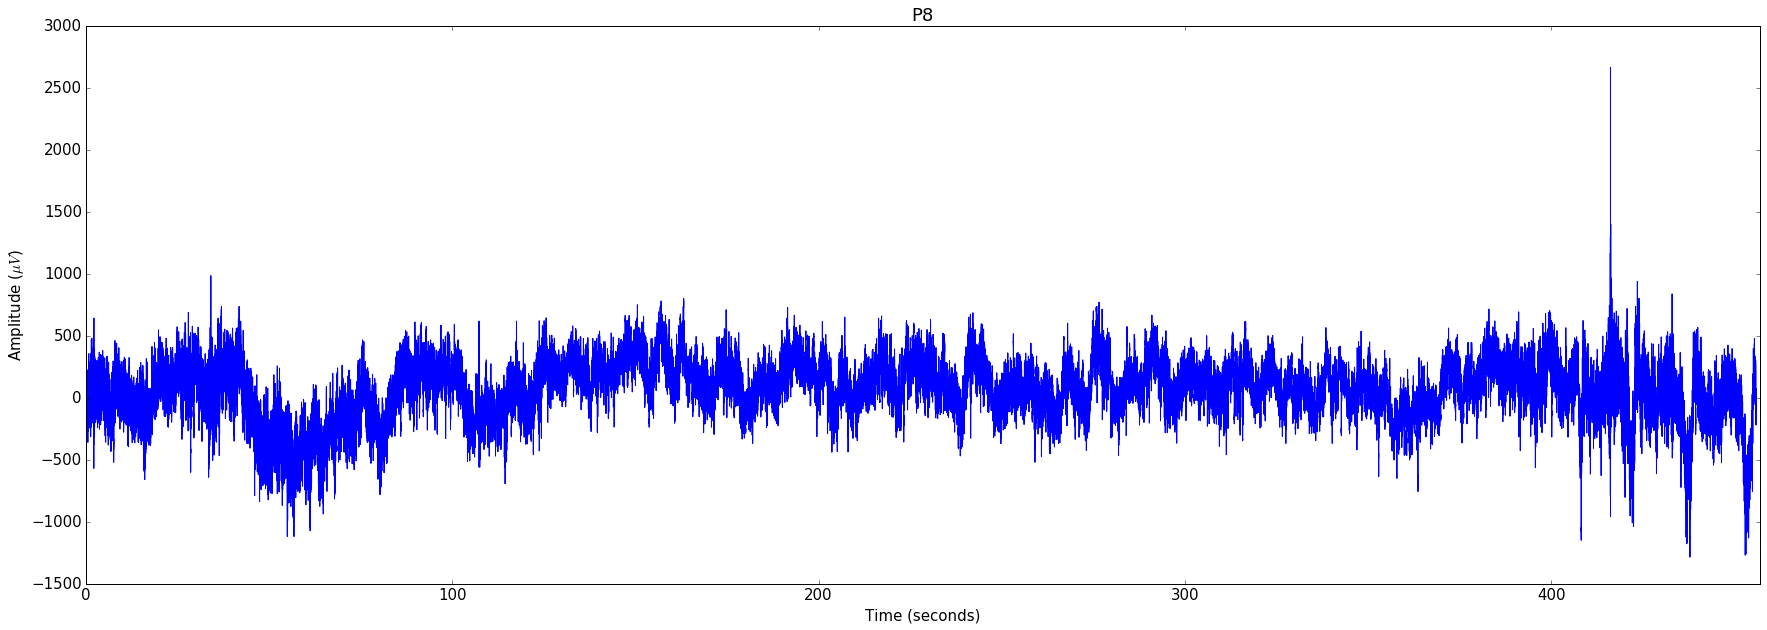

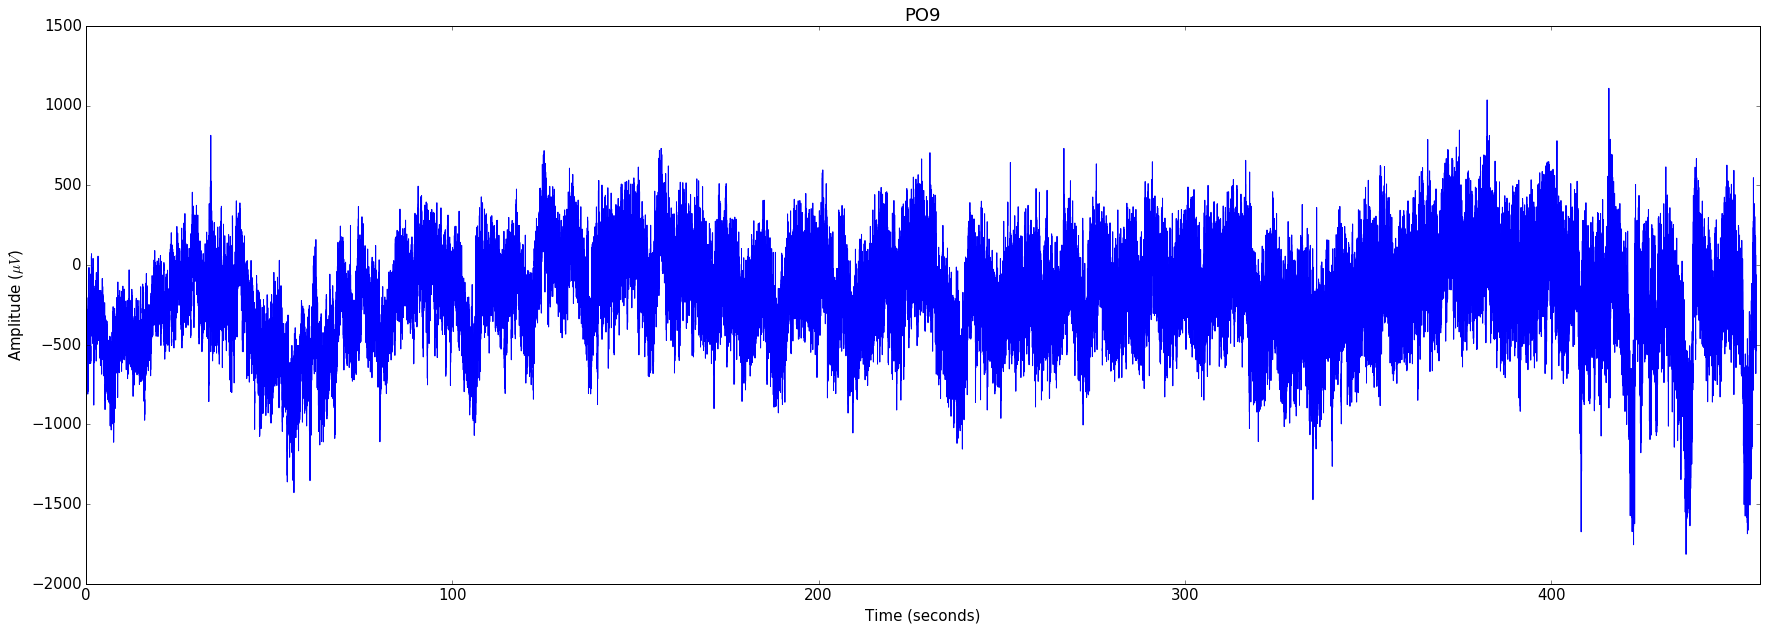

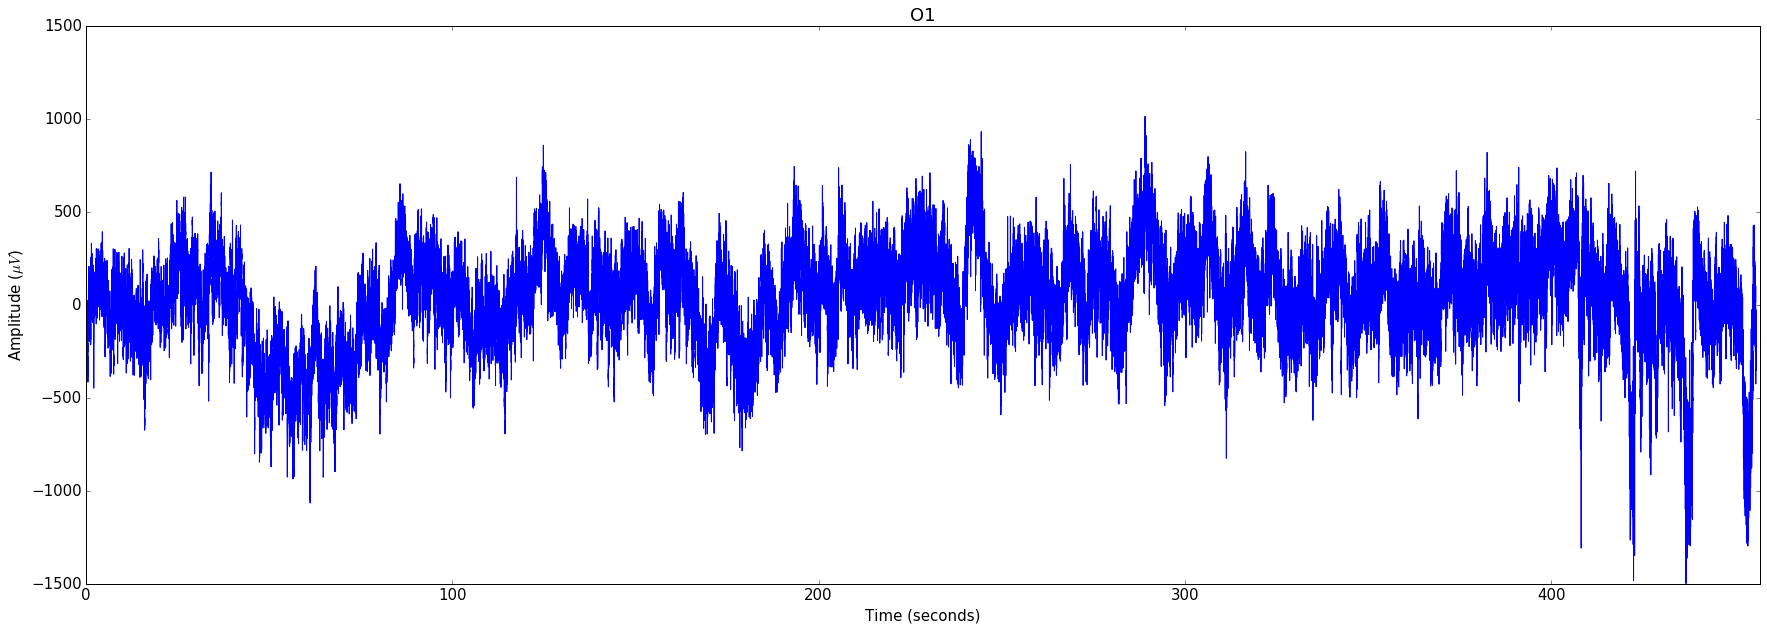

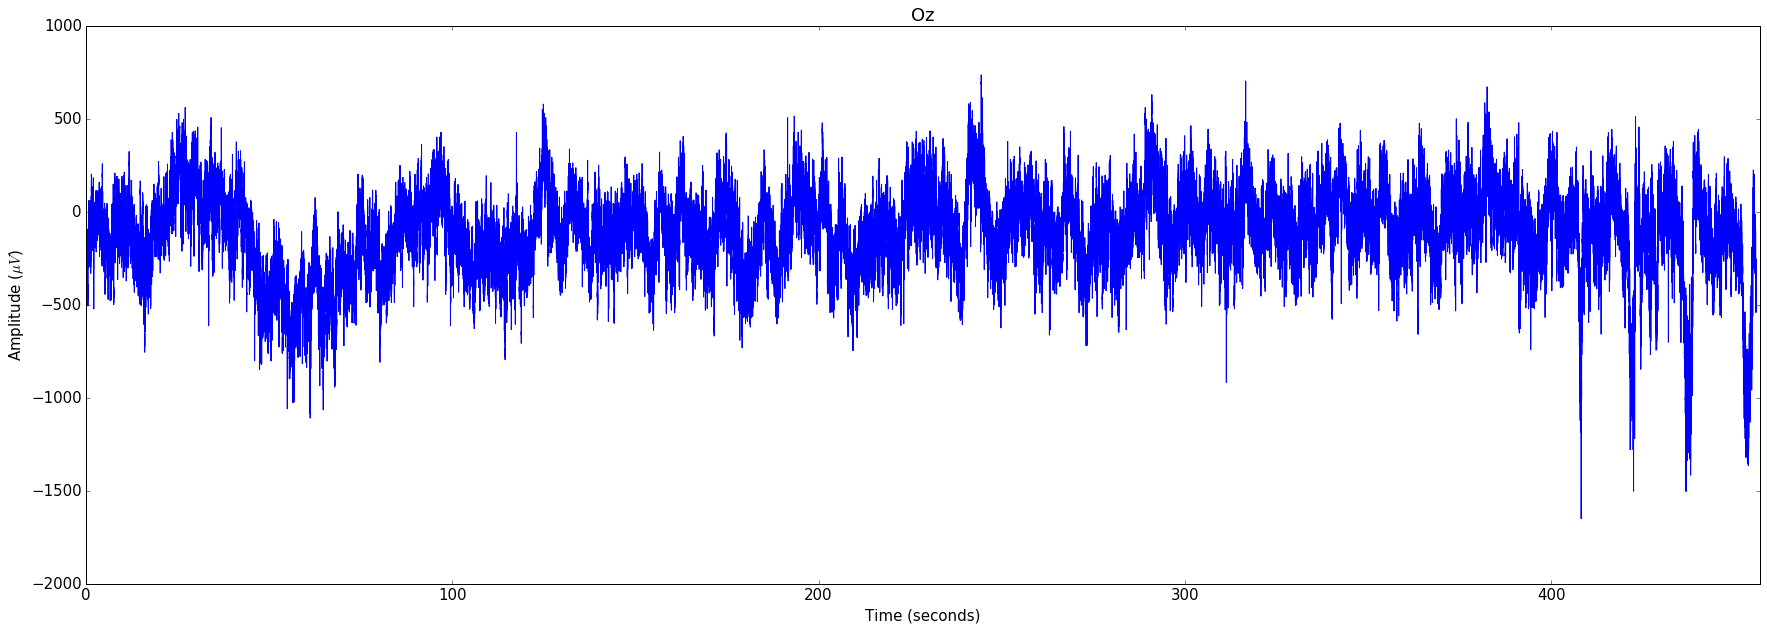

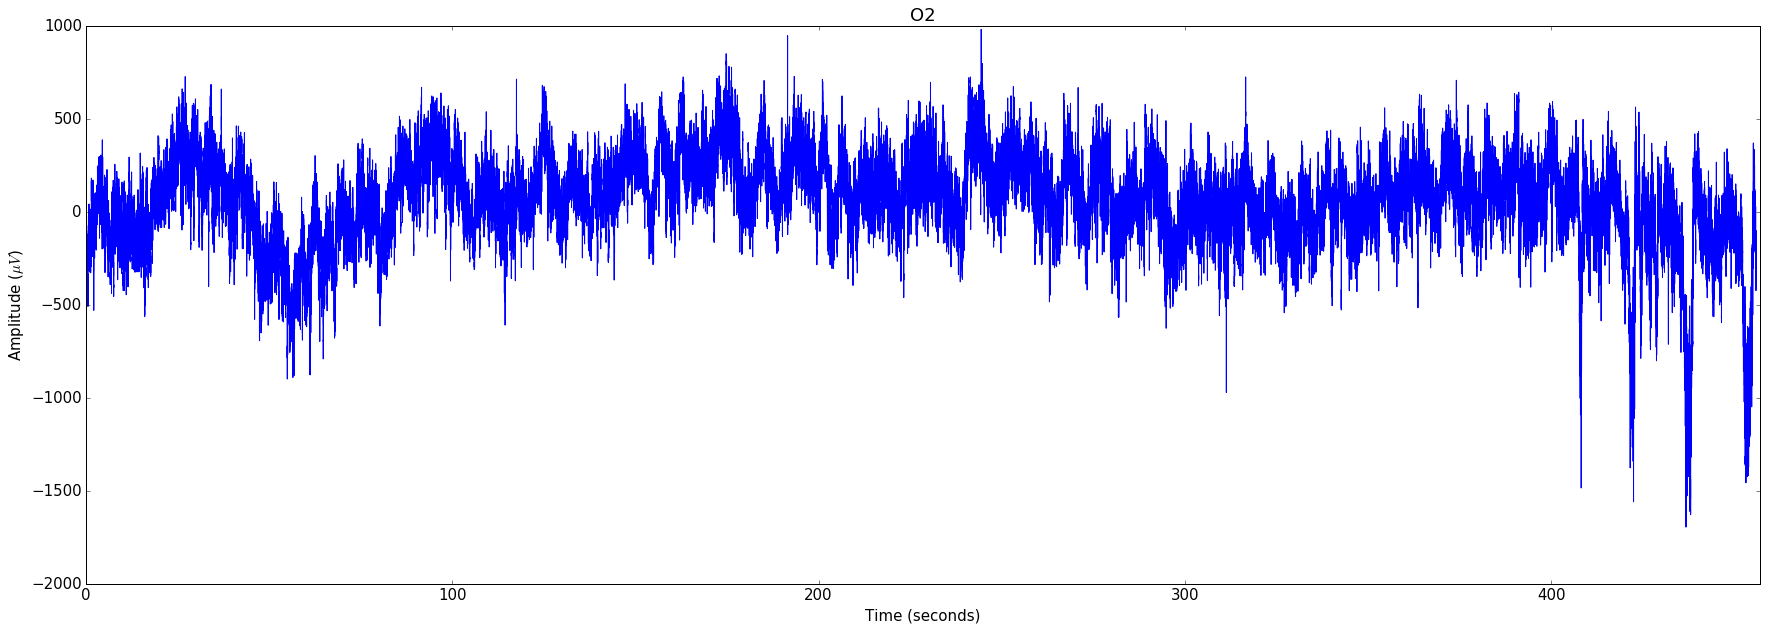

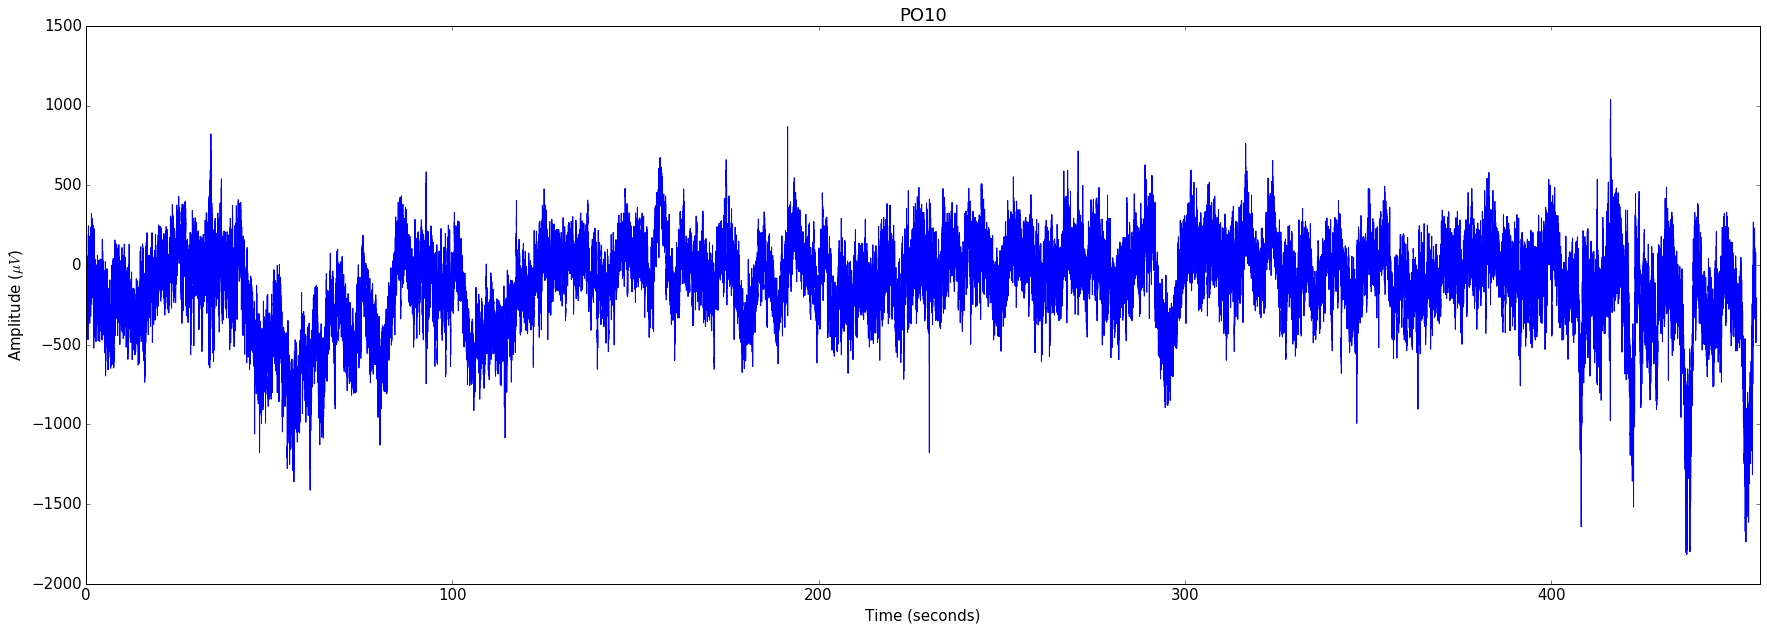

In [19]:
#let's look at the time series of all the plots
for col in series.columns:
    fig = plt.gcf()
    fig.set_size_inches((30, 10))
    #plt.plot(x_axis[:10000], series[col].values[:10000])
    plt.plot(x_axis, series[col].values)
    plt.xlabel('Time (seconds)')
    plt.ylabel(r'Amplitude ($\mu V$)')
    plt.xlim(0, x_axis[-1] + 1)
    #plt.xlim(0)
    plt.title(col)
    plt.show()
    plt.close()


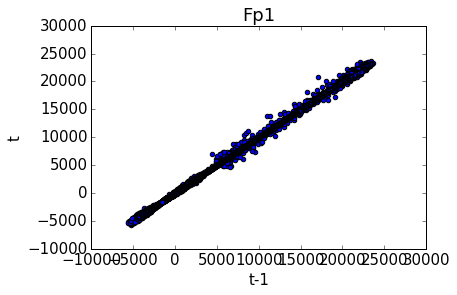

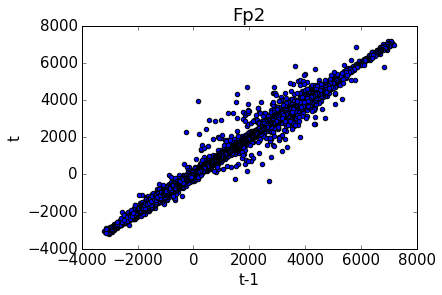

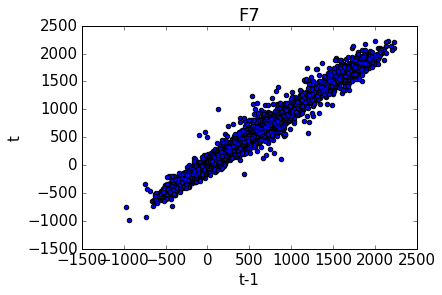

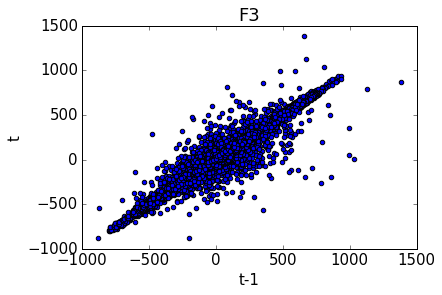

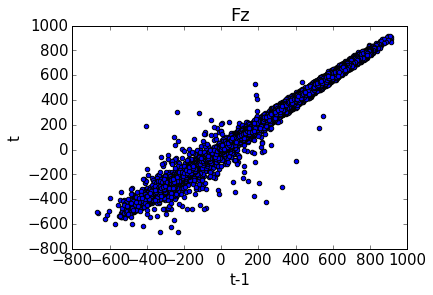

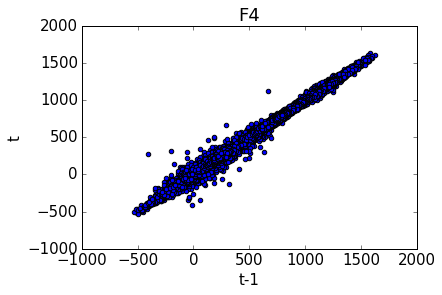

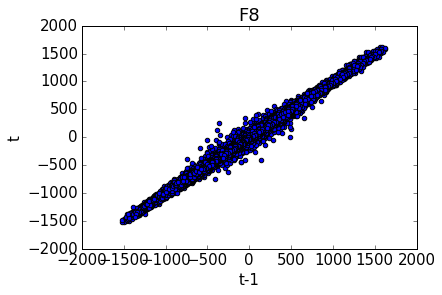

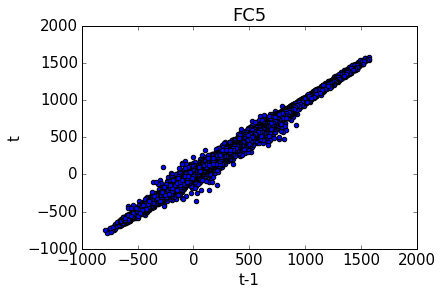

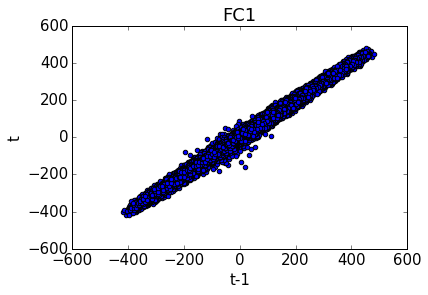

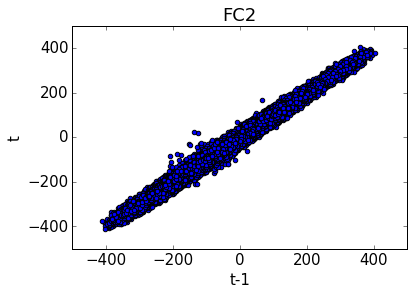

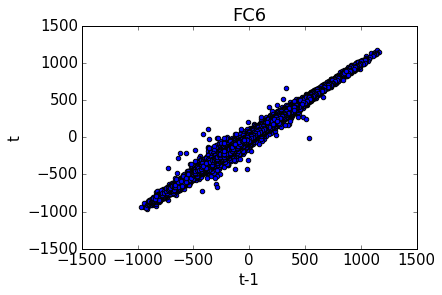

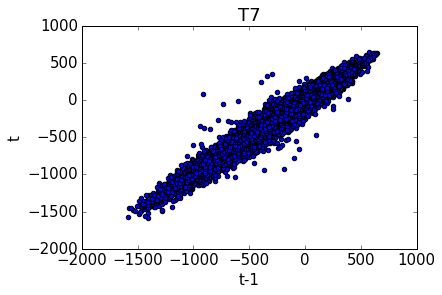

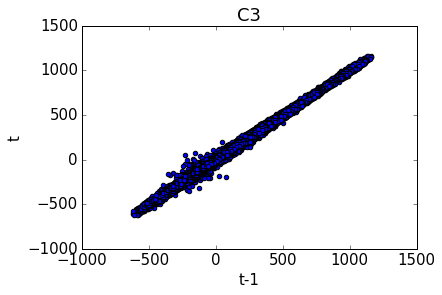

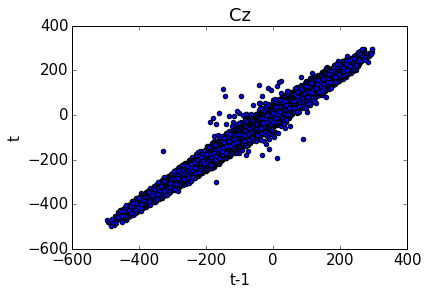

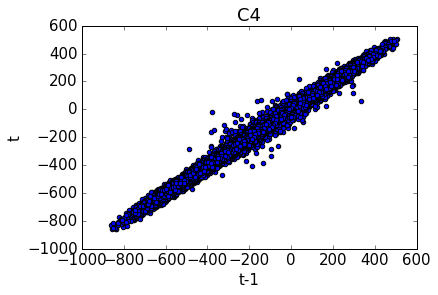

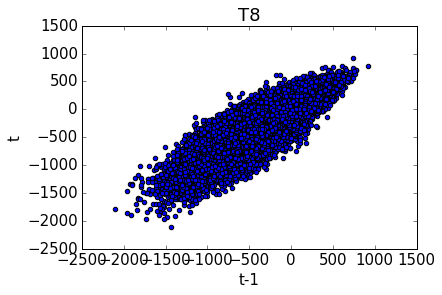

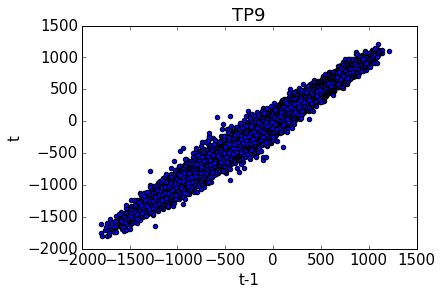

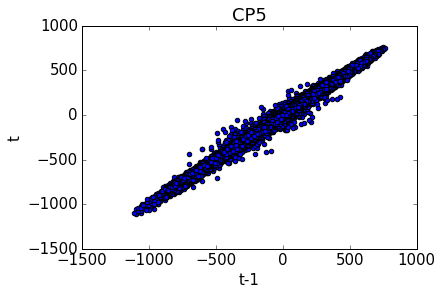

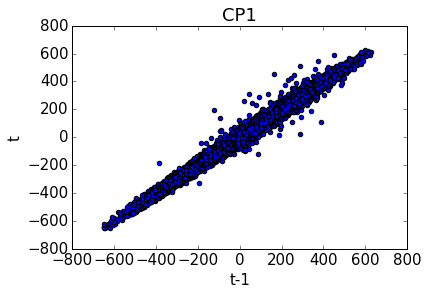

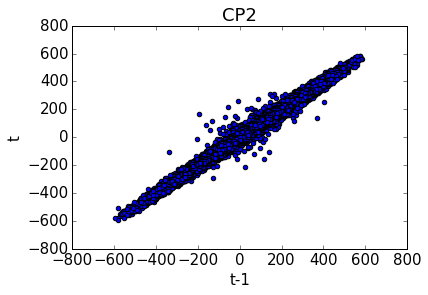

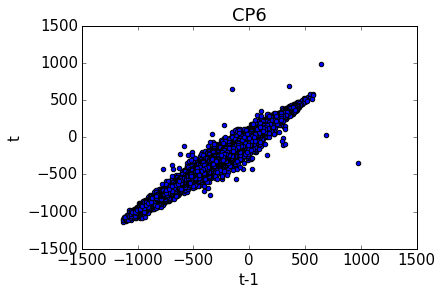

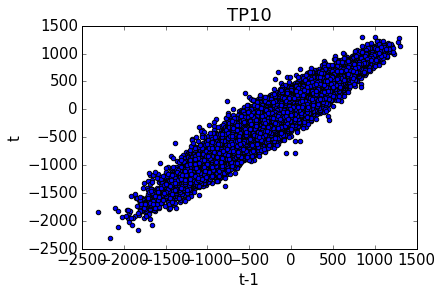

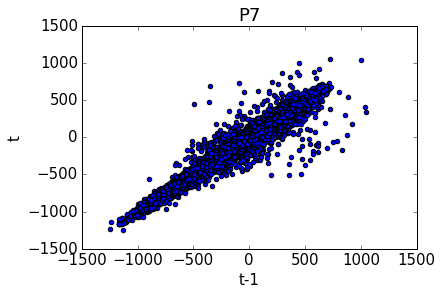

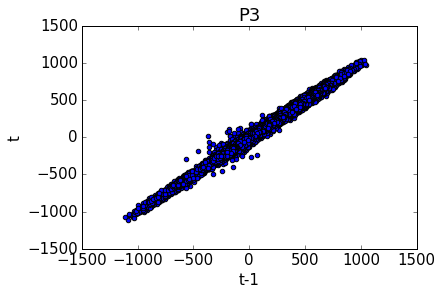

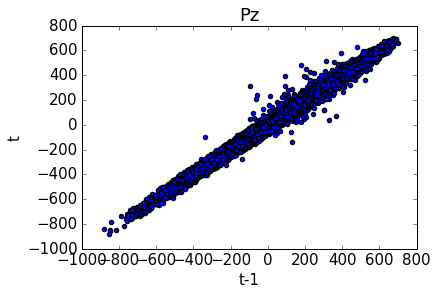

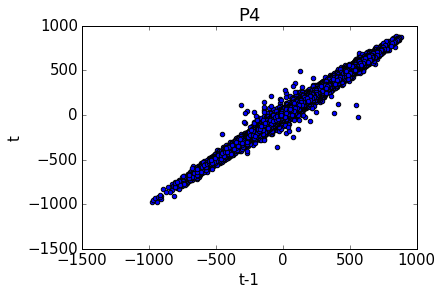

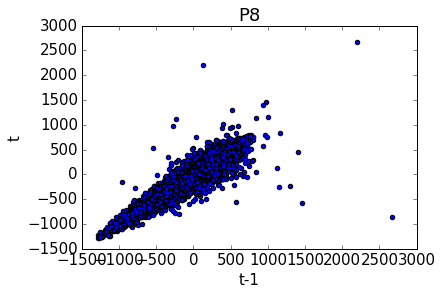

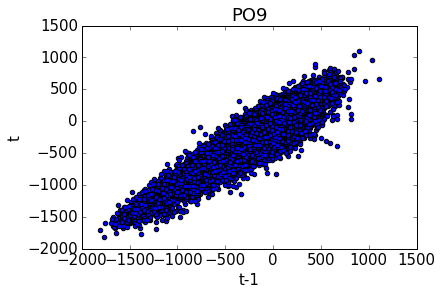

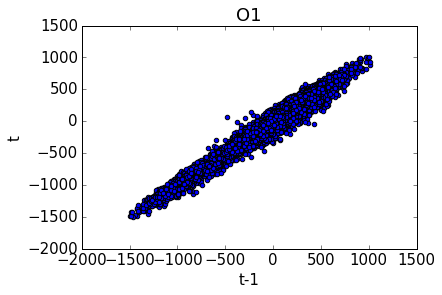

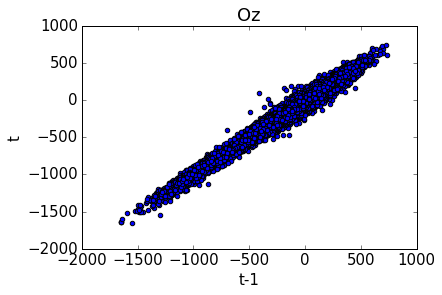

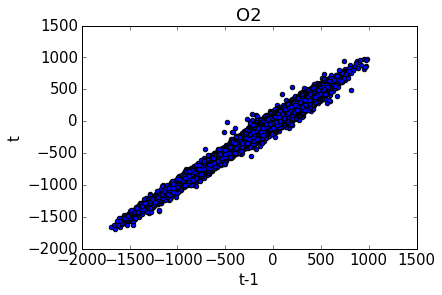

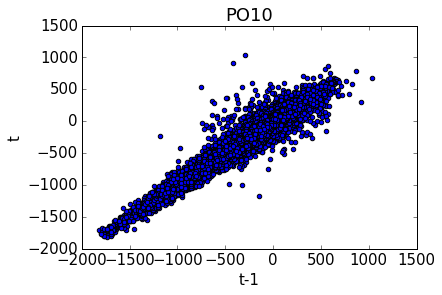

In [20]:
# autocorrelation plots
for col in series.columns:
    col_values = series[col].values
    plt.scatter(col_values[:-1], col_values[1:])
    plt.xlabel('t-1')
    plt.ylabel(r't')
    plt.title(col)
    plt.show()
    plt.close()

In [21]:
for i in range(series.shape[1]):
    print (np.corrcoef(series.values[1:, i], series.values[:-1, i])[0, 1])

0.999696622209
0.998162611532
0.995888885716
0.9931651855
0.99768683588
0.997005922026
0.99763544451
0.997269613506
0.993503639844
0.992847799415
0.996032982602
0.98514210765
0.996479014374
0.98995228926
0.99522596068
0.886607466215
0.99057993575
0.995449300747
0.993131533672
0.992344919492
0.990815987053
0.955737315987
0.98391678261
0.995445525206
0.994571357991
0.993773357591
0.975987834751
0.934686185483
0.980968126189
0.985414413913
0.989047116301
0.979258475847


In [22]:
covariance = np.cov(series.values.T)
corr = np.corrcoef(series.values.T)


for i in list(corr):
    print(i)

[ 1.          0.7354763   0.44799275  0.14380388 -0.05070144  0.06184045
  0.25409483  0.01355348 -0.02166892 -0.06544926  0.04010648 -0.07544981
 -0.05490845 -0.05101223  0.01362679 -0.03662918 -0.08626212 -0.04695447
  0.002853   -0.01607501 -0.03442736 -0.14364628 -0.0806991  -0.09994131
  0.06885707 -0.13691879 -0.03230275 -0.12441877 -0.0870562  -0.04162529
 -0.11963394 -0.05372576]
[ 0.7354763   1.          0.53587052  0.37506941  0.19855323  0.36860974
  0.42793559  0.15313347  0.09939317  0.00623657  0.24560166  0.07495623
  0.02961872 -0.12457176  0.20778901  0.08469357 -0.09905392  0.11463186
 -0.01777781  0.06781749  0.08725068 -0.08409454 -0.00698559 -0.05147434
  0.0844389  -0.12377573  0.0379826  -0.12911792 -0.07015607 -0.05248544
 -0.09088181 -0.0123504 ]
[ 0.44799275  0.53587052  1.          0.65785701  0.22115625  0.41584162
  0.57394601  0.58317592  0.44606527  0.33026354  0.54899665  0.51280112
  0.36387564  0.10498412  0.44217408  0.33836809  0.33434429  0.43966958

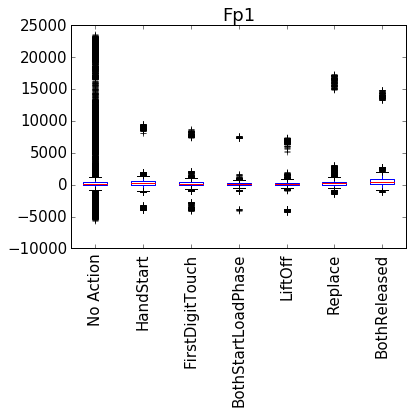

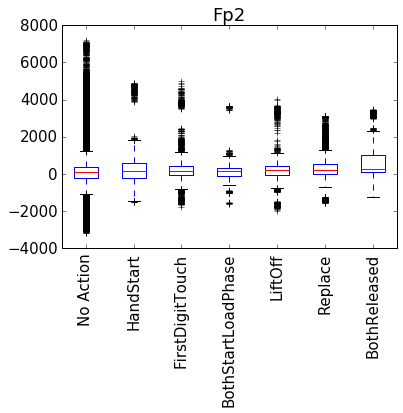

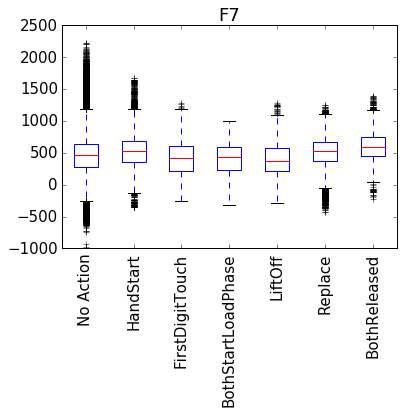

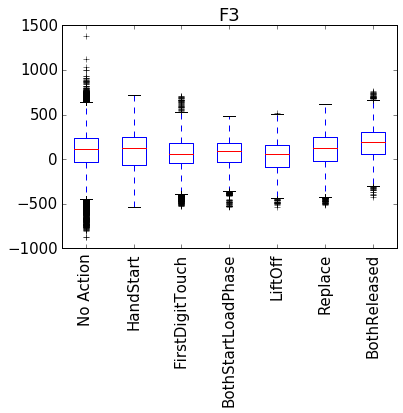

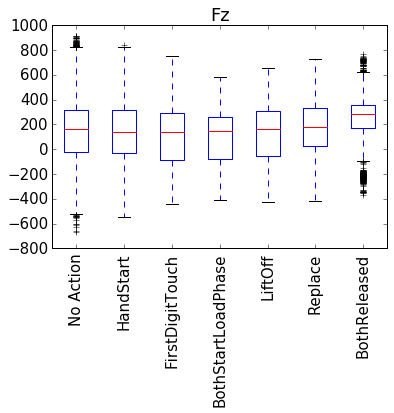

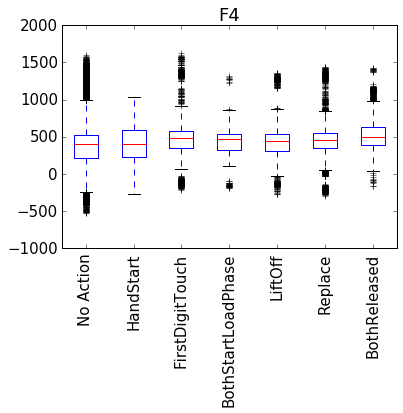

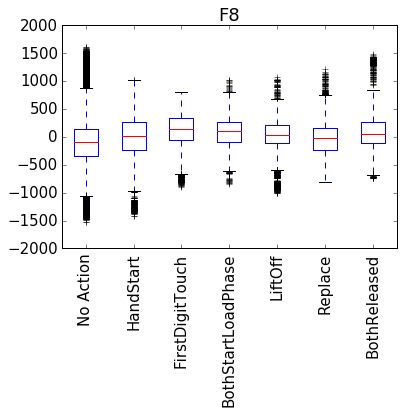

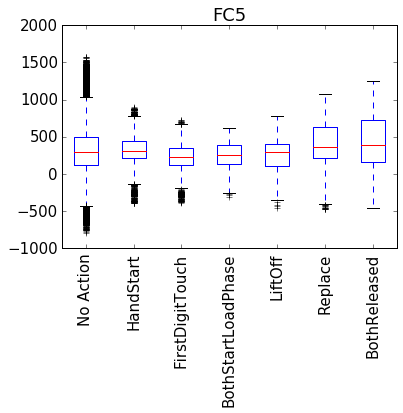

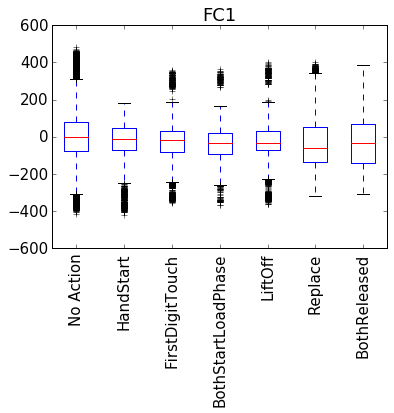

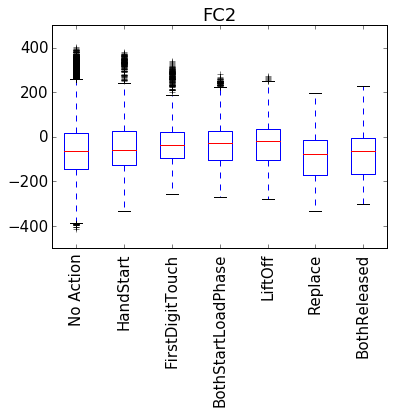

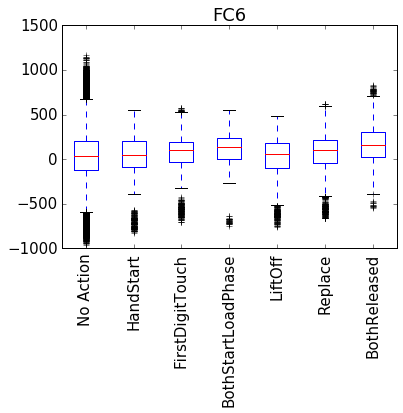

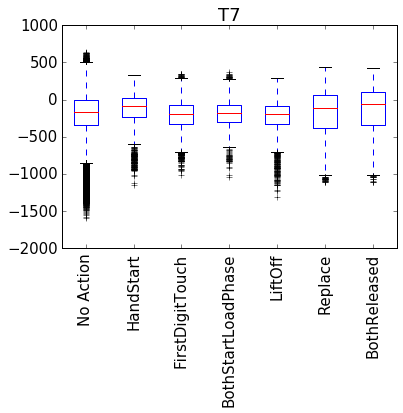

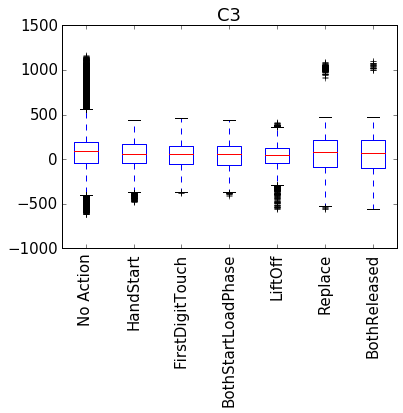

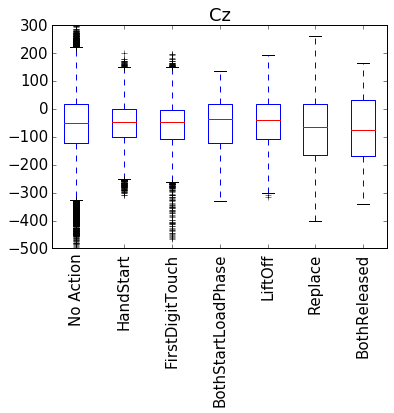

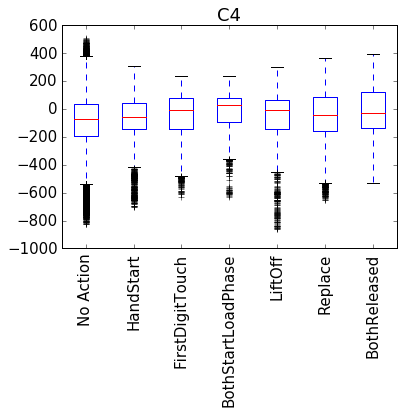

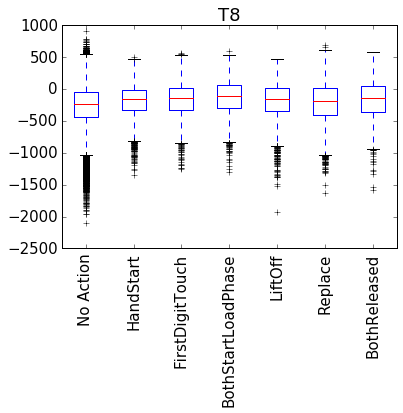

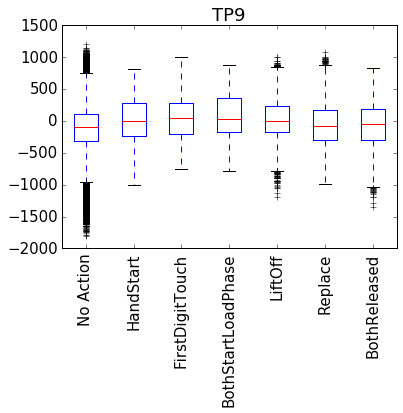

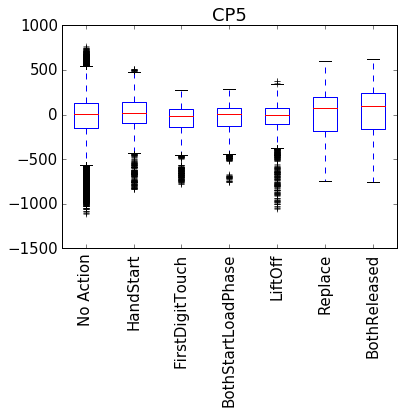

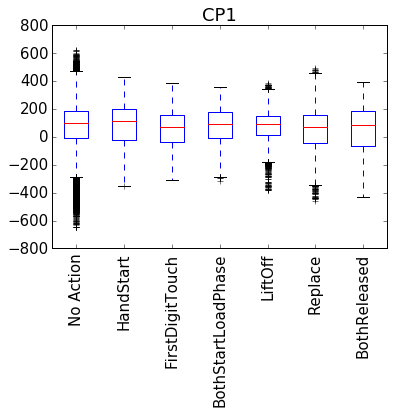

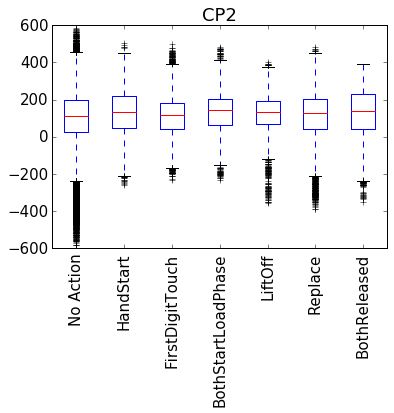

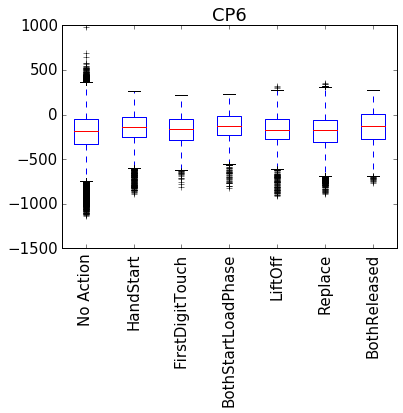

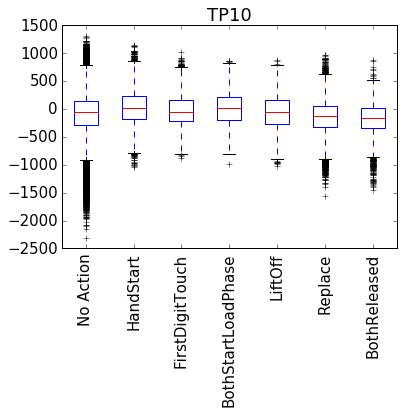

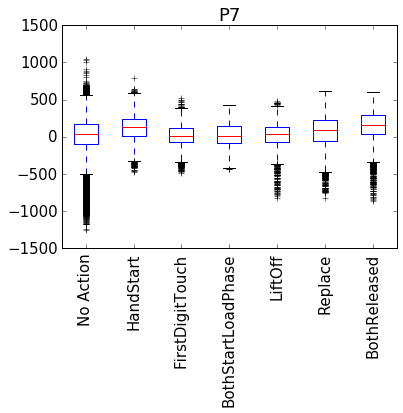

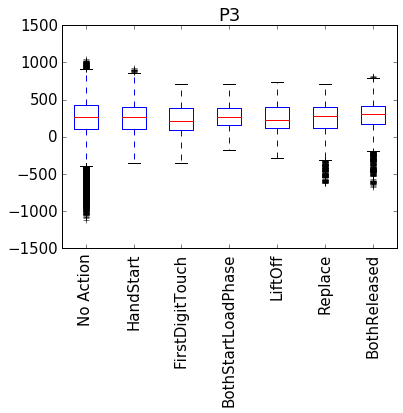

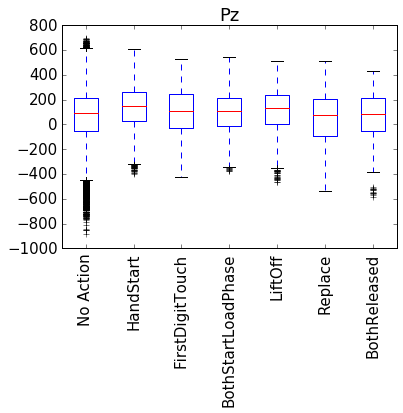

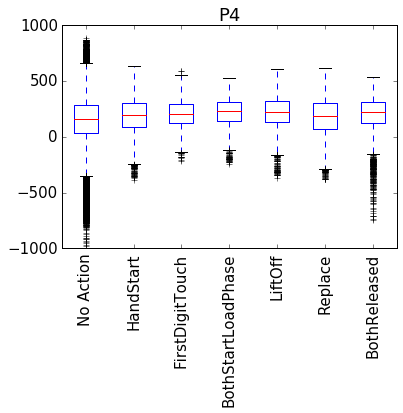

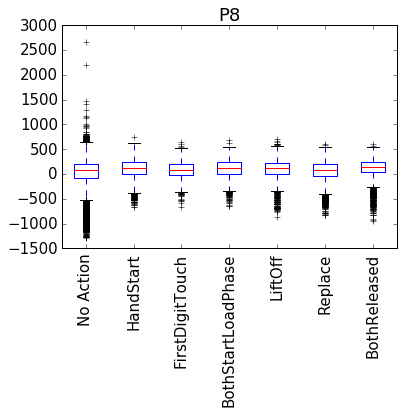

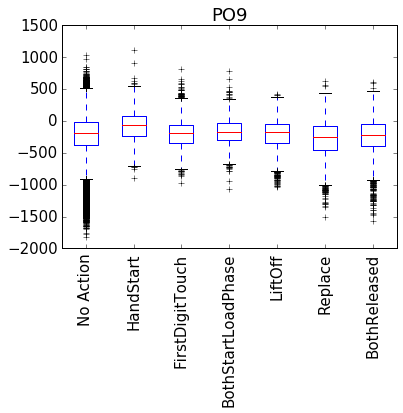

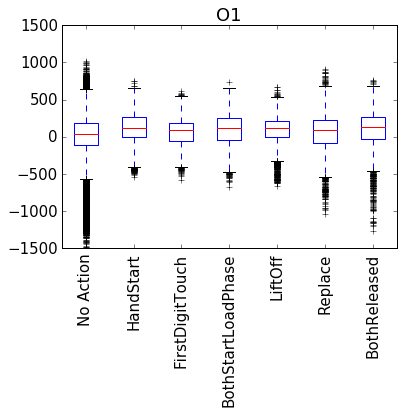

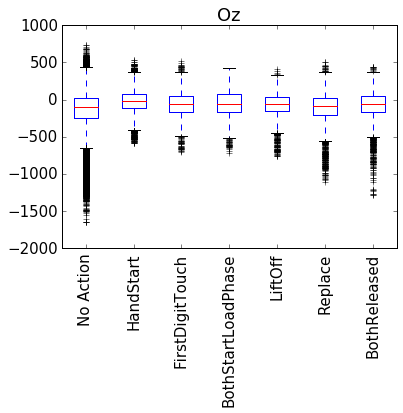

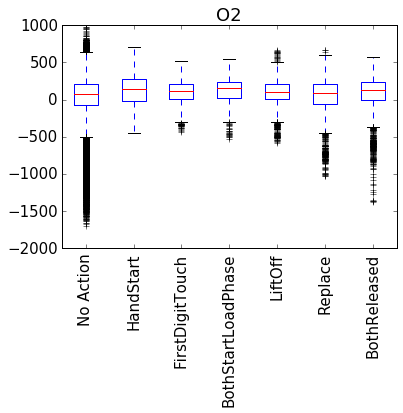

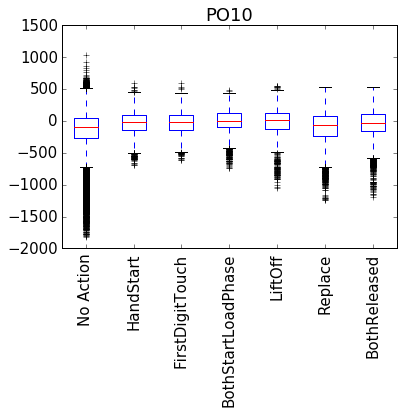

In [23]:
# distribution of the columns in the data split by features
num_classes = 7 # 6 activities plus no activity

for feature in series.columns:
    feature_by_label = []
    for i in range(num_classes):
        # for each class label, get the rows where the class happened
        indexes = np.where(labels == i)[0]
        feature_by_label.append(series[feature].values[indexes])
    plt.boxplot(feature_by_label)
    plt.title(feature)
    plt.xticks(locations[1:], names[:-1], rotation='vertical')
    plt.show()
    plt.close()

In [24]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X = series.values
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
# lr.predict_proba gives a probability for each class
y_prob = lr.predict_proba(X)
y_prob



array([[  9.84417696e-01,   9.09122212e-04,   4.35570284e-04, ...,
          1.98414318e-03,   1.10416590e-02,   4.76834002e-04],
       [  9.65594678e-01,   1.47218321e-03,   9.50763202e-04, ...,
          2.89493202e-03,   2.54561260e-02,   2.07558570e-03],
       [  9.42384460e-01,   2.11407198e-03,   1.50711018e-03, ...,
          4.09356828e-03,   4.28129147e-02,   4.17126589e-03],
       ..., 
       [  9.23199755e-01,   5.72986521e-02,   5.72032654e-03, ...,
          6.65071269e-03,   6.17059915e-03,   6.31130429e-04],
       [  9.32601925e-01,   4.14548473e-02,   6.79275429e-03, ...,
          9.91410810e-03,   7.96692608e-03,   8.05894246e-04],
       [  9.10573714e-01,   5.76279581e-02,   8.47197163e-03, ...,
          1.06478227e-02,   1.07264251e-02,   1.30715158e-03]])

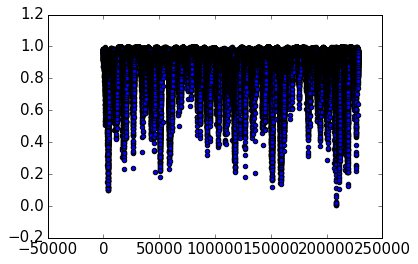

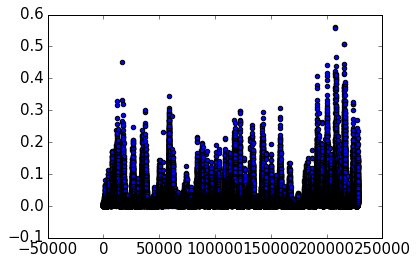

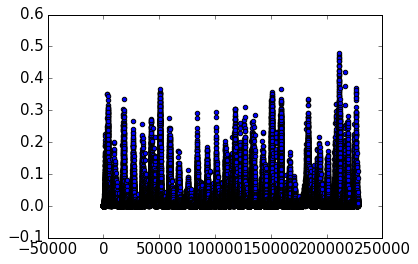

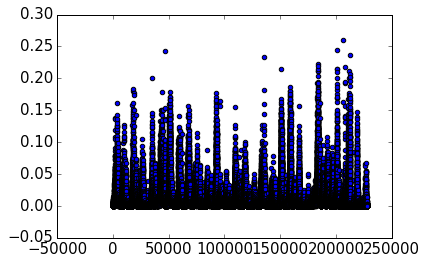

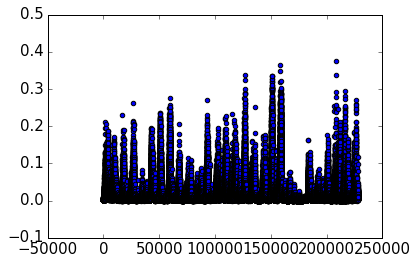

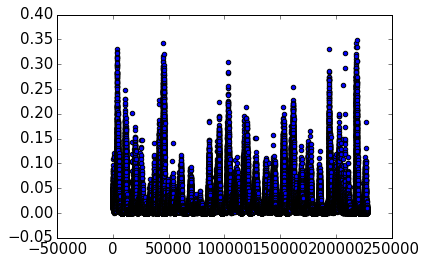

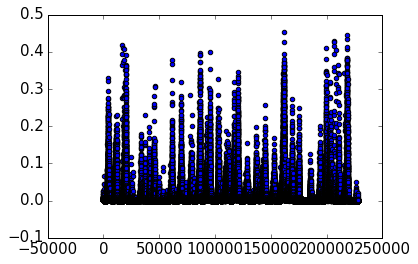

In [26]:
for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()


In [28]:
from sklearn.metrics import roc_auc_score 
for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')


No Action: 0.797127611242
HandStart: 0.817762351443
FirstDigitTouch: 0.874976741858
BothStartLoadPhase: 0.8704271049
LiftOff: 0.8636263494
Replace: 0.856120478316
BothReleased: 0.914248672647


In [29]:
def extract_features(ts):
    """
    ts is the time series of labels as a numpy array
    """
    last_state = 0
    last_state_nz = 6
    time_since_last_nz = 2
    duration_of_cur_state = 1
    X = []
    for i in range(len(ts)):
        cur_state = ts[i]
        X.append([last_state, last_state_nz, time_since_last_nz, duration_of_cur_state])
        
        if last_state == cur_state:
            duration_of_cur_state += 1
        else:
            duration_of_cur_state = 0
        if cur_state != 0:
            last_state_nz = cur_state
            time_since_last_nz = 1
        else:
            time_since_last_nz += 1
        last_state = cur_state
    X = np.array(X)
    return X

X = extract_features(labels)

lr = LogisticRegression()
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

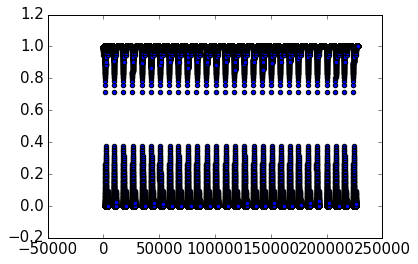

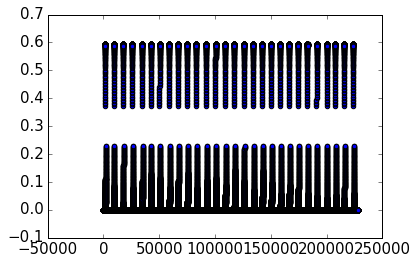

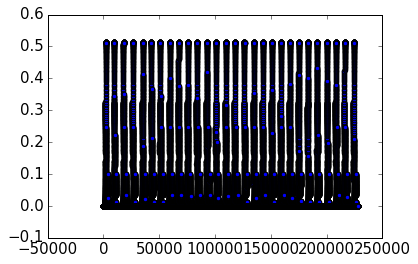

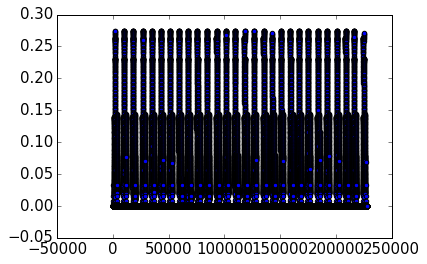

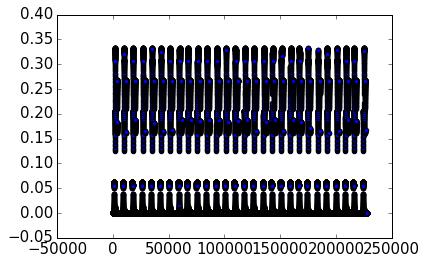

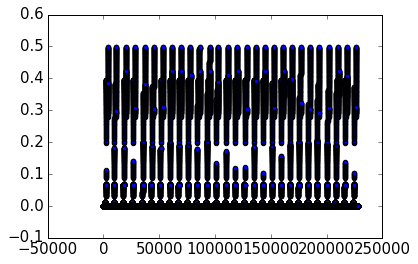

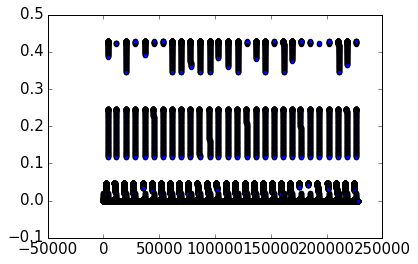

In [30]:
y_prob = lr.predict_proba(X)

for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()

In [31]:
from sklearn.metrics import roc_auc_score

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')

No Action: 0.998820946402
HandStart: 0.996355319213
FirstDigitTouch: 0.996163059811
BothStartLoadPhase: 0.990545271362
LiftOff: 0.997513050738
Replace: 0.993771566066
BothReleased: 0.999568558317


In [32]:
from sklearn.metrics import precision_recall_fscore_support
y_true = labels
y_pred = np.argmax(y_prob, axis=1)
prec, rec, fscore, supp = precision_recall_fscore_support(y_true, y_pred)
print ("Precision:", ["%.3f" % i for i in prec])
print ("Recall:", ["%.3f" % i for i in rec])
print ("F-1 Score:", ["%.3f" % i for i in fscore])


Precision: ['0.997', '0.993', '0.828', '0.988', '0.769', '0.622', '0.993']
Recall: ['0.999', '0.993', '0.920', '0.261', '0.466', '0.993', '0.773']
F-1 Score: ['0.998', '0.993', '0.872', '0.413', '0.581', '0.765', '0.869']
